In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_5min.csv')
df = pd.read_csv('JPY_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222740, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751
2020-01-01 17:05:00,108.759,108.738,108.736,108.759
2020-01-01 17:10:00,108.738,108.728,108.590,108.750
2020-01-01 17:15:00,108.728,108.677,108.575,108.735
2020-01-01 17:20:00,108.679,108.686,108.679,108.694


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222739, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,108.730,108.751,108.715,108.751,108.738,17,2,1,-0.021,108.7330,0.036,108.73675,-22.264326
2020-01-01 17:05:00,108.759,108.738,108.736,108.759,108.728,17,2,1,0.021,108.7475,0.023,108.74800,-22.239388
2020-01-01 17:10:00,108.738,108.728,108.590,108.750,108.677,17,2,1,0.010,108.6700,0.160,108.70150,-22.374542
2020-01-01 17:15:00,108.728,108.677,108.575,108.735,108.686,17,2,1,0.051,108.6550,0.160,108.67875,-22.419407
2020-01-01 17:20:00,108.679,108.686,108.679,108.694,108.703,17,2,1,-0.007,108.6865,0.015,108.68450,-22.390568


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.715  108.751         108.738    17    2   
2020-01-01 17:05:00  108.759  108.736  108.759         108.728    17    2   
2020-01-01 17:10:00  108.738  108.590  108.750         108.677    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.686    17    2   
2020-01-01 17:20:00  108.679  108.679  108.694         108.703    17    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1    -0.021   108.7330  0.036   108.73675 -22.264326  
2020-01-01 17:05:00     1     0.021   108.7475  0.023   108.74800 -22.239388  
2020-01-01 17:10:00     1     0.010   108.6700  0.160   108.70150 -22.374542  
2020-01-01 17:15:00     1     0.051   108.6550  0.160   108.67875

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178191
178191
22000
22000
22548
22548


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(178191, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178166, 24, 12)
(21975, 24, 12)
(22523, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178166, 1)
(21975, 1)
(22523, 1)


array([[0.24513888],
       [0.24537253],
       [0.24533916],
       ...,
       [0.8828335 ],
       [0.8822999 ],
       [0.8840008 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.24513888, 0.24537253, 0.24533916, ..., 0.8828335 , 0.8822999 ,
       0.8840008 ], dtype=float32)

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD5_GRU_BiLSTM.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
460/463 [============================>.] - ETA: 0s - loss: 399.7274 - mae: 3.0230 - mse: 399.7274 - root_mean_squared_error: 19.9932 - mape: 5665.6455
Epoch 1: val_mse improved from inf to 0.06275, saving model to /content/drive/MyDrive/modelweights/JPY_USD5_GRU_BiLSTM.hdf5
463/463 [==============================] - 21s 20ms/step - loss: 397.3361 - mae: 3.0060 - mse: 397.3361 - root_mean_squared_error: 19.9333 - mape: 5632.3857 - val_loss: 0.0628 - val_mae: 0.2189 - val_mse: 0.0628 - val_root_mean_squared_error: 0.2505 - val_mape: 17851.4531
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0391 - mae: 0.1533 - mse: 0.0391 - root_mean_squared_error: 0.1977 - mape: 2050.5535
Epoch 2: val_mse did not improve from 0.06275
463/463 [==============================] - 7s 16ms/step - loss: 0.0391 - mae: 0.1533 - mse: 0.0391 - root_mean_squared_error: 0.1977 - mape: 2050.5535 - val_loss: 0.0943 - val_mae: 0.2778 - val_mse: 0.0943 - val_root_mean_squared_error: 0

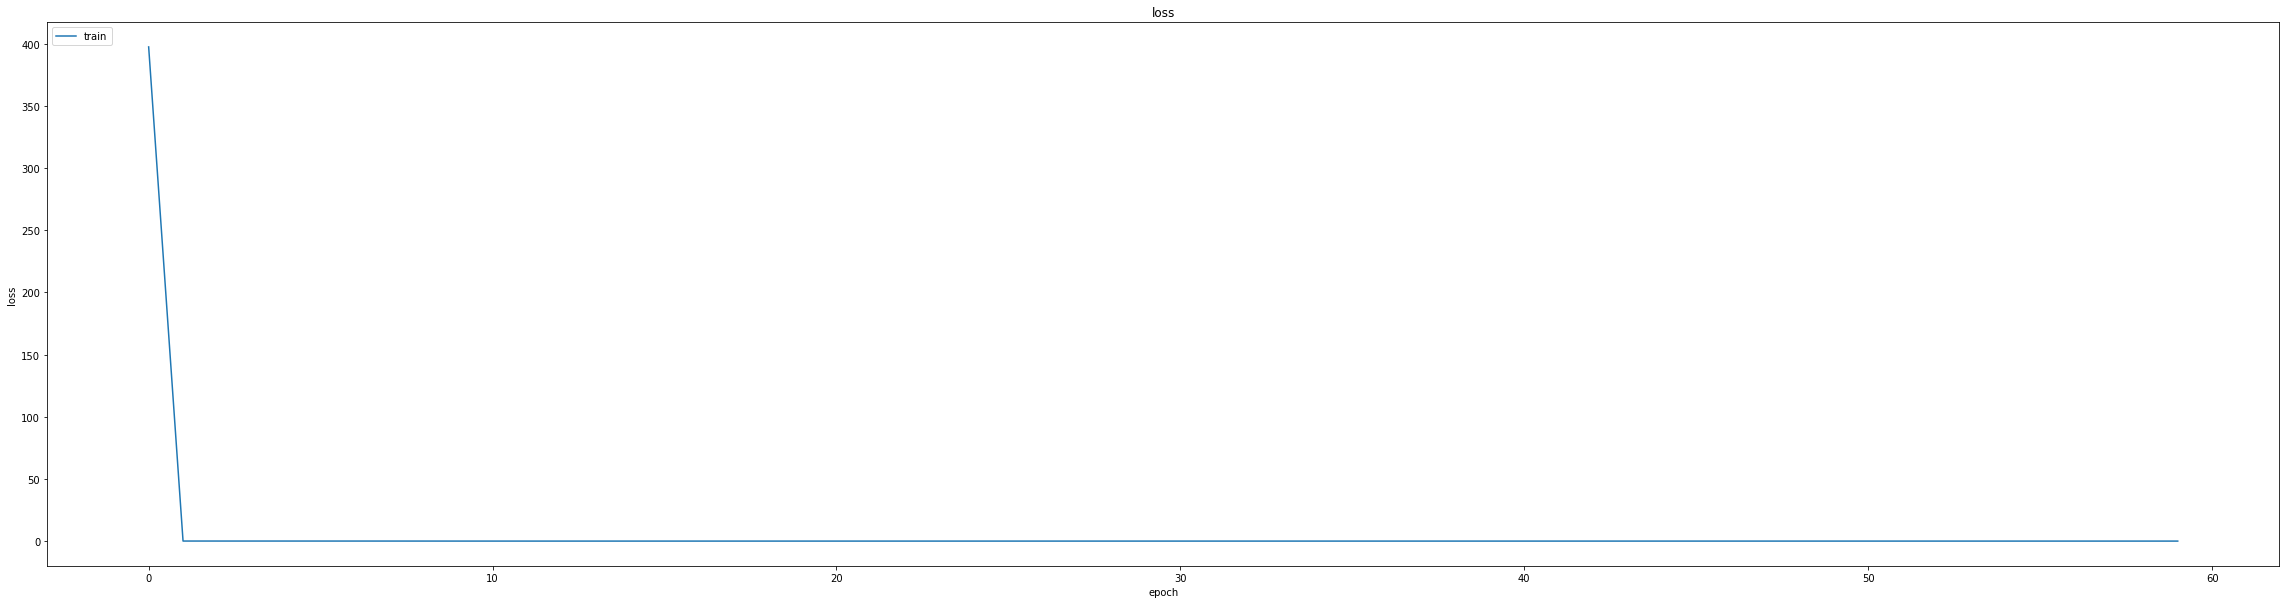

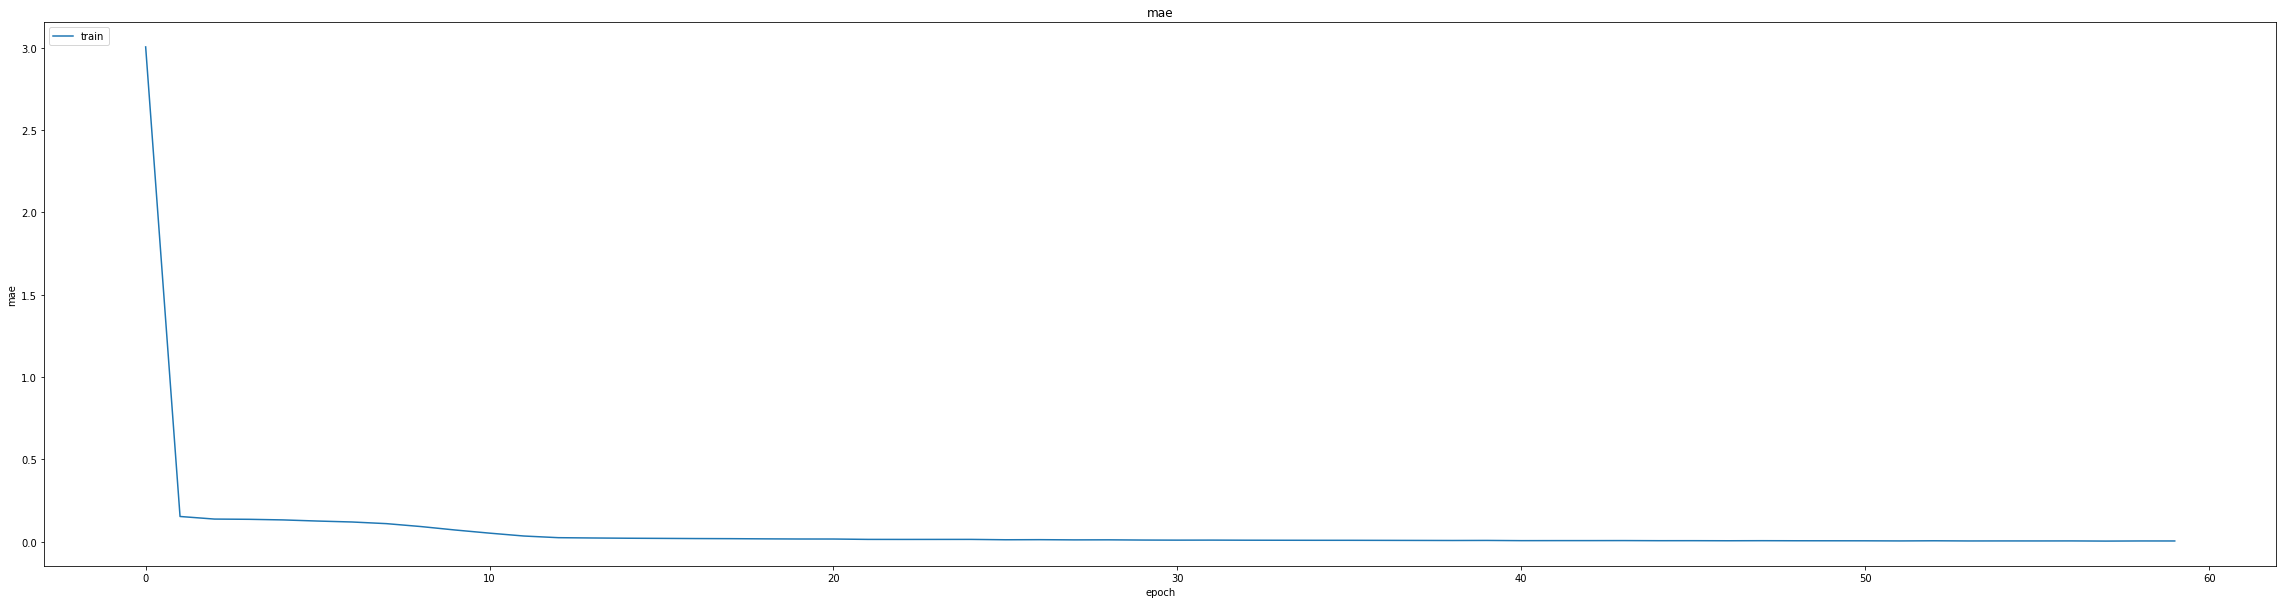

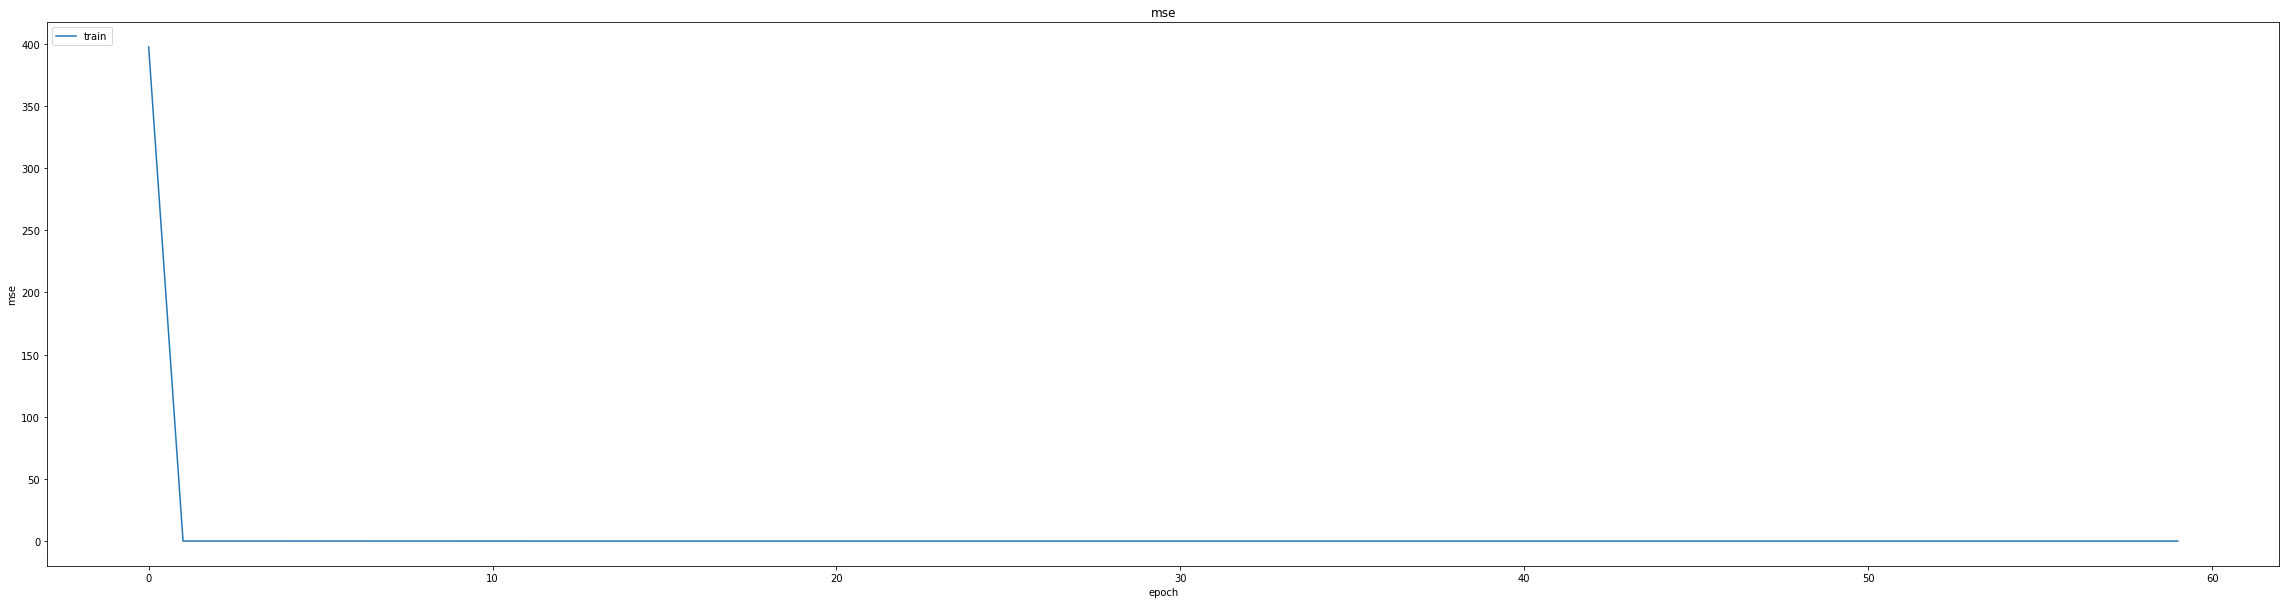

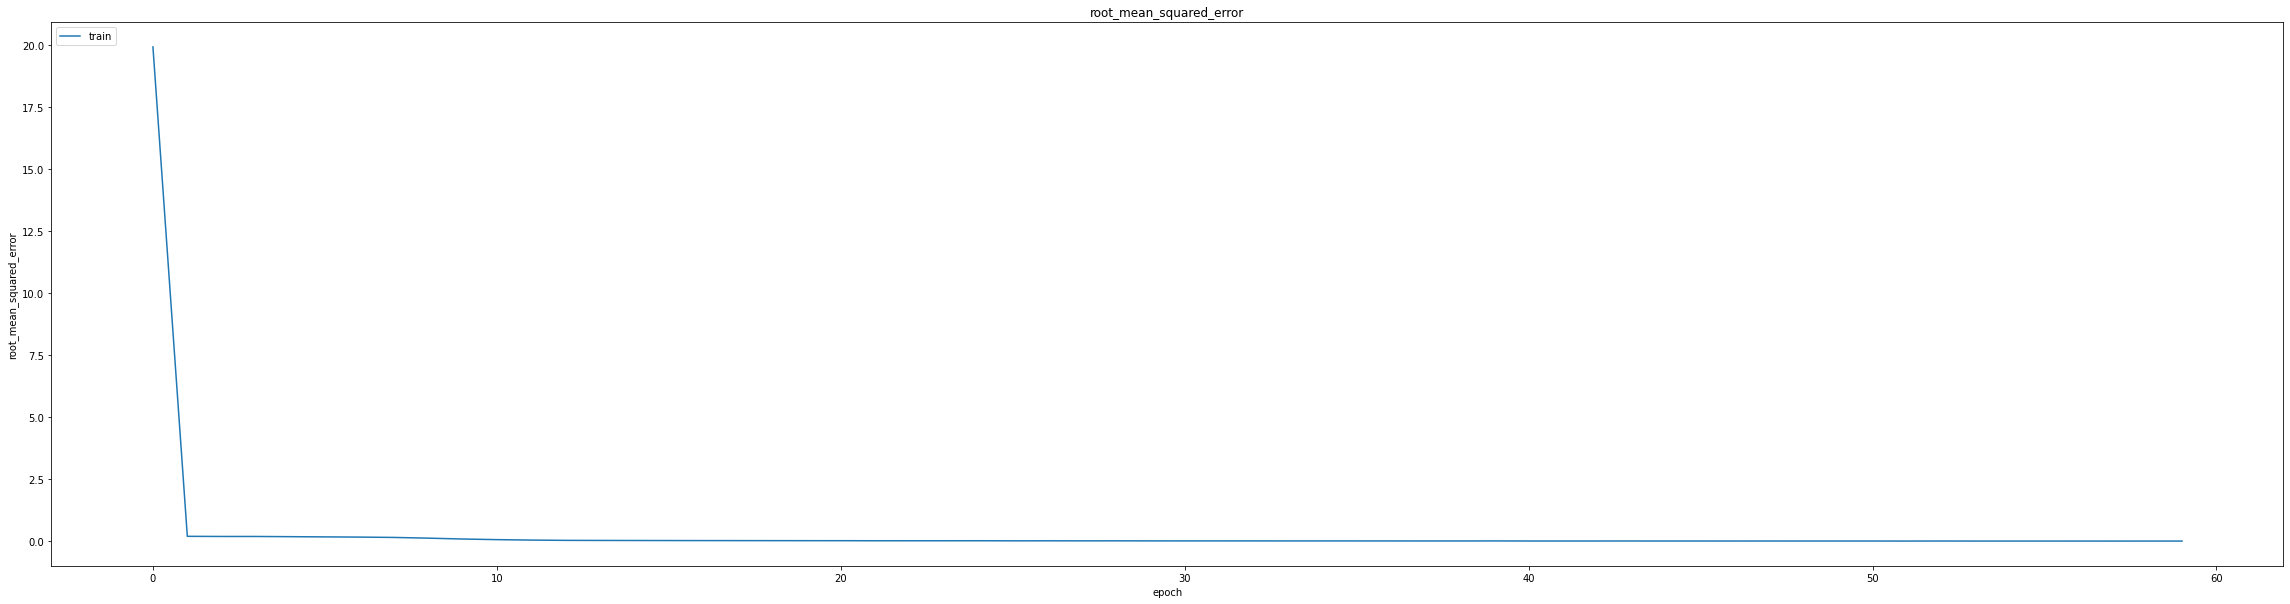

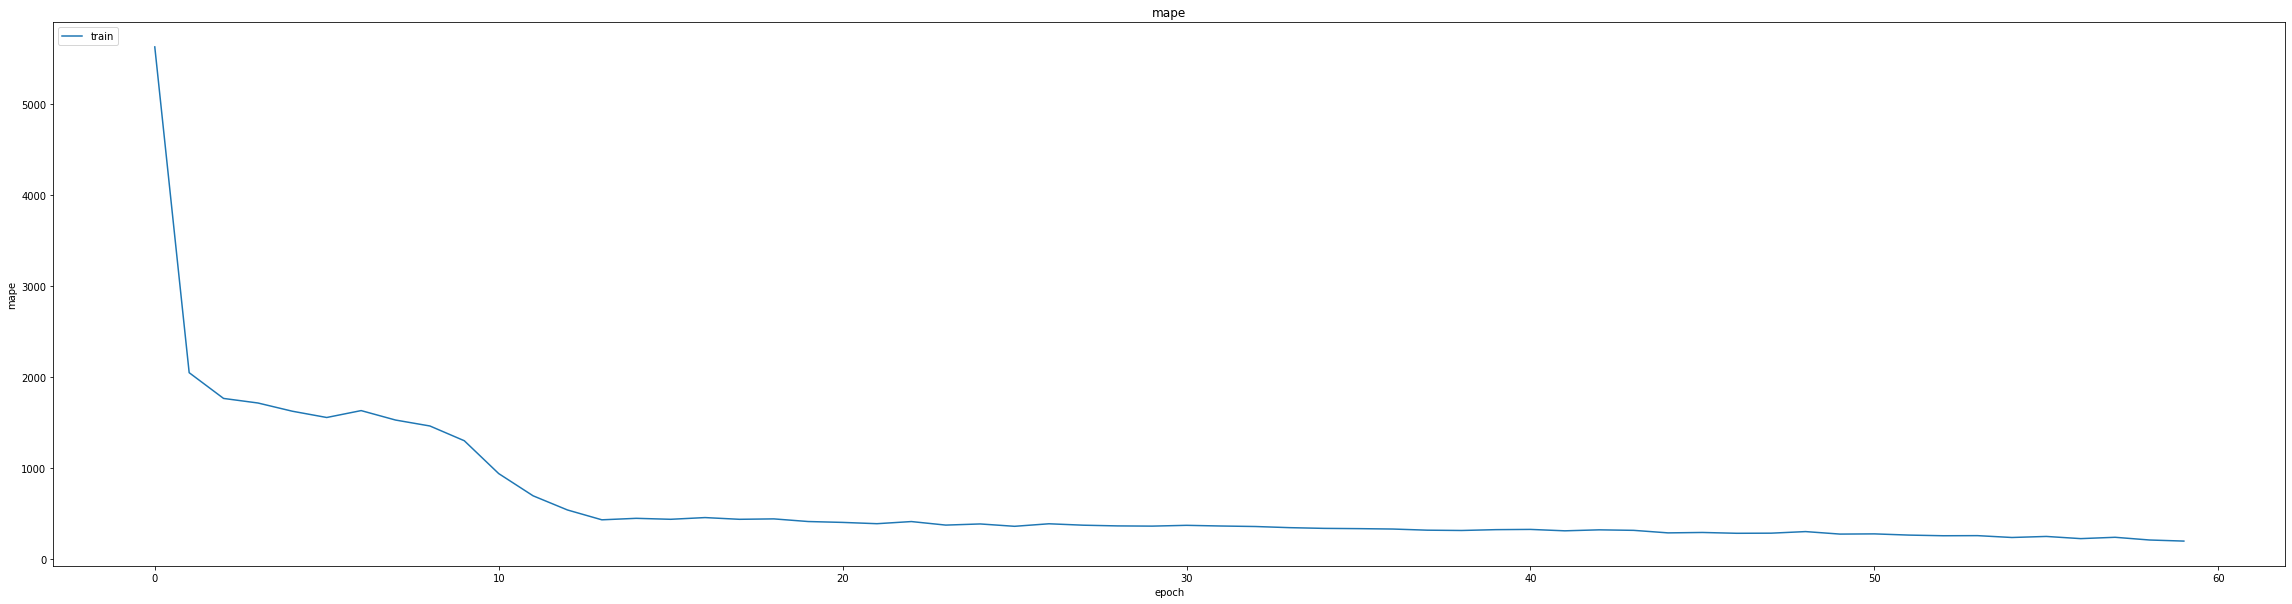

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008354698307812214
0.011326589621603489
687/687 [==============================] - 6s 6ms/step
0.9929213342669435


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD5_GRU_BiLSTM.hdf5")
early_stopping1 = EarlyStopping(monitor='val_mse', patience=16)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping1]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 2.9697e-04 - mae: 0.0070 - mse: 2.9697e-04 - root_mean_squared_error: 0.0172 - mape: 325.6906
Epoch 1: val_mse did not improve from 0.00013
463/463 [==============================] - 16s 20ms/step - loss: 2.9697e-04 - mae: 0.0070 - mse: 2.9697e-04 - root_mean_squared_error: 0.0172 - mape: 325.6906 - val_loss: 1.8379e-04 - val_mae: 0.0106 - val_mse: 1.8379e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 2476.0820 - lr: 0.0010
Epoch 2/20
462/463 [============================>.] - ETA: 0s - loss: 2.4646e-05 - mae: 0.0035 - mse: 2.4646e-05 - root_mean_squared_error: 0.0050 - mape: 301.6316
Epoch 2: val_mse did not improve from 0.00013
463/463 [==============================] - 7s 16ms/step - loss: 2.4648e-05 - mae: 0.0035 - mse: 2.4648e-05 - root_mean_squared_error: 0.0050 - mape: 301.1329 - val_loss: 1.3811e-04 - val_mae: 0.0086 - val_mse: 1.3811e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 2279.7961 - lr

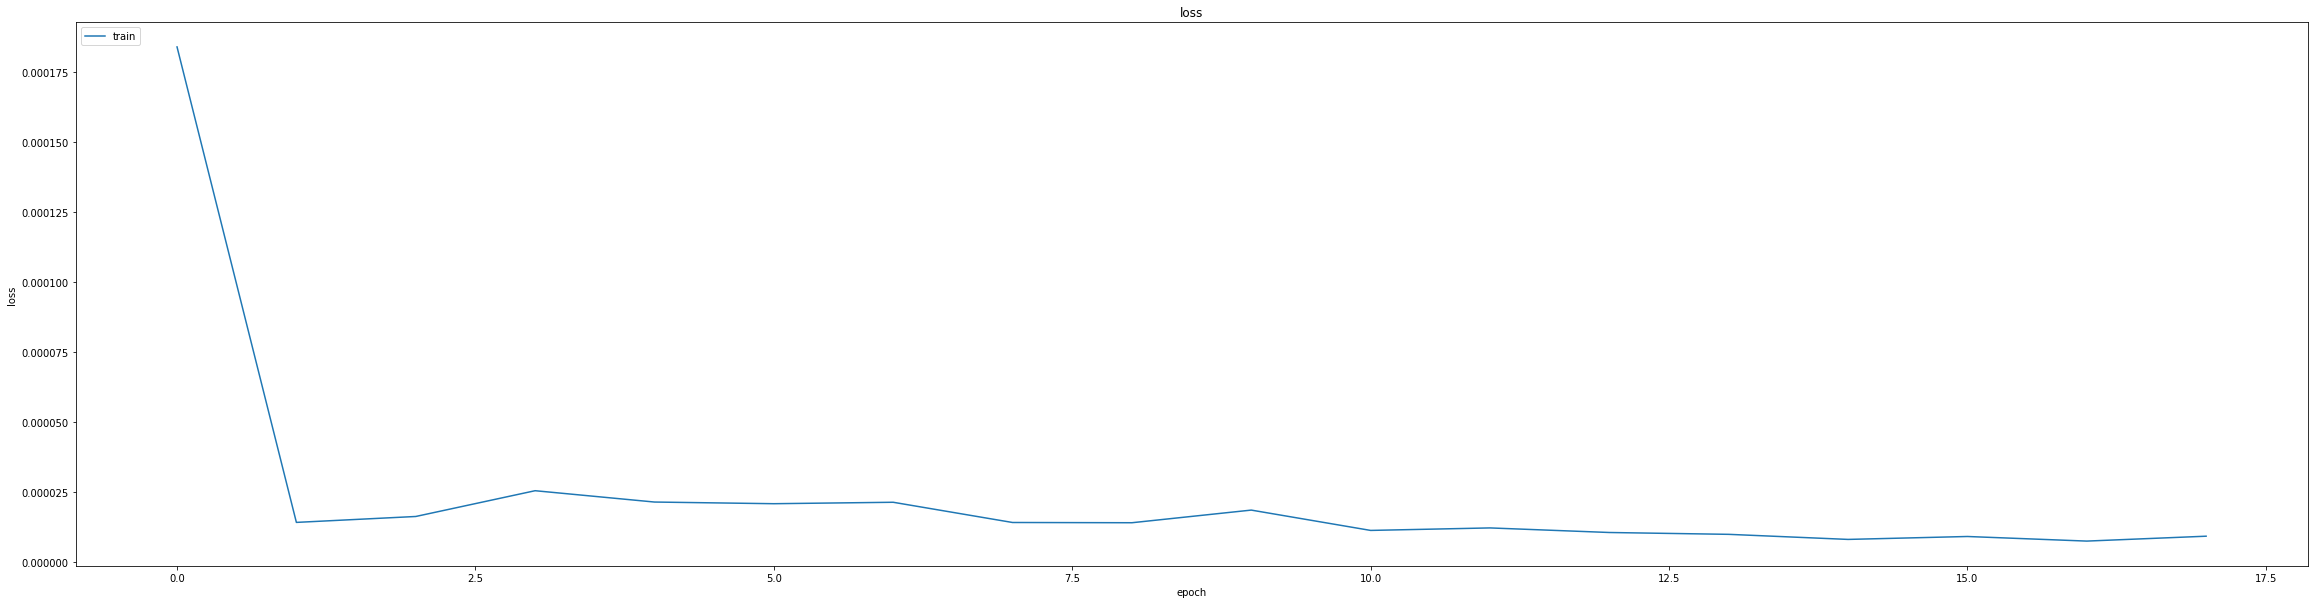

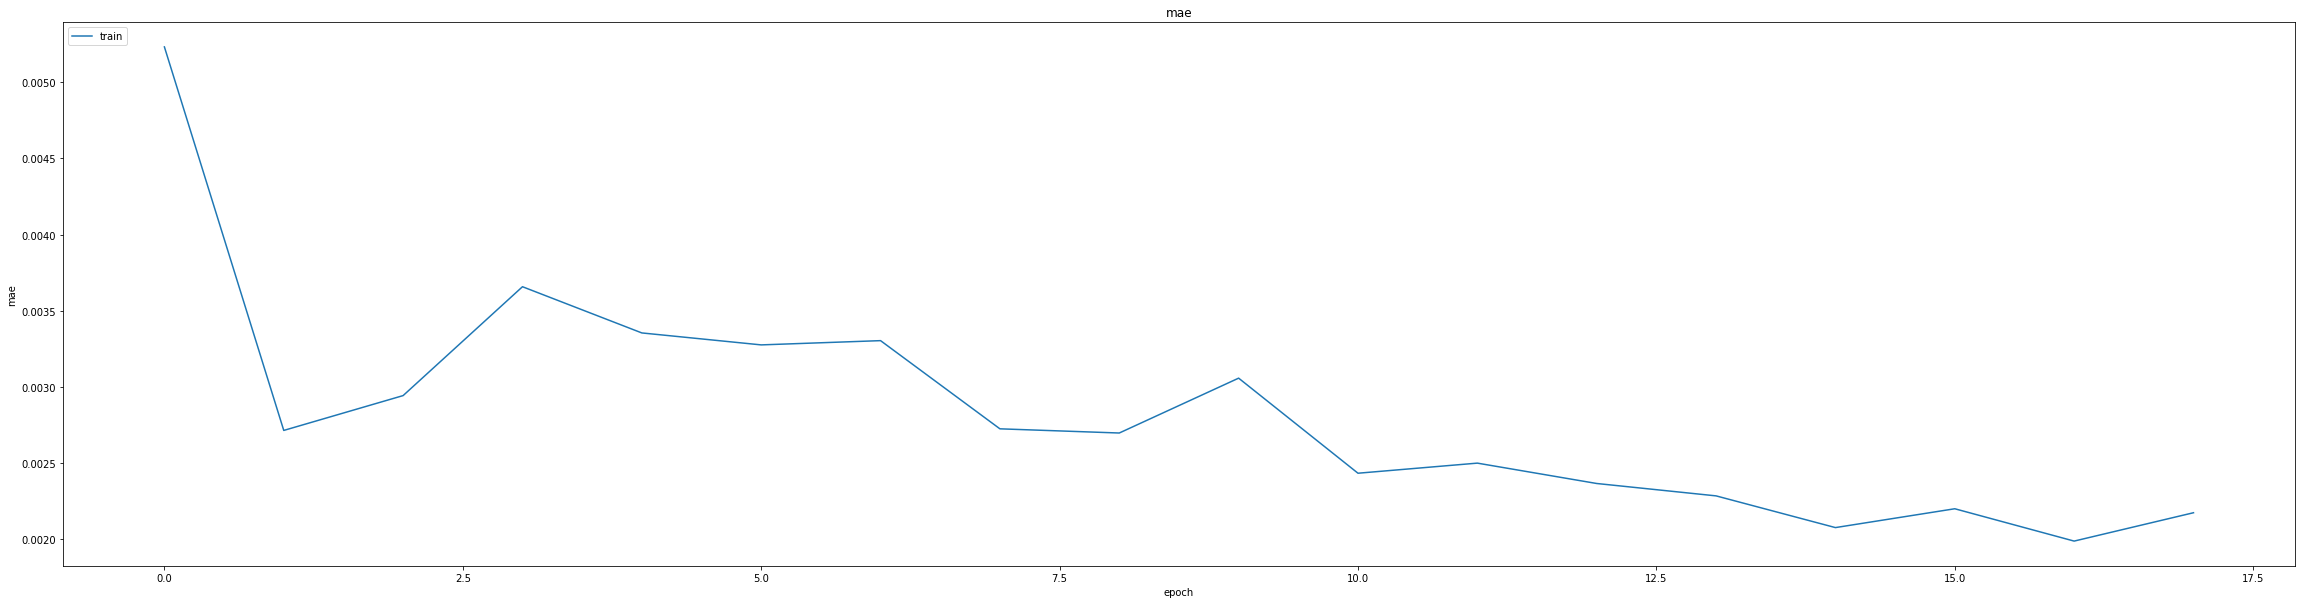

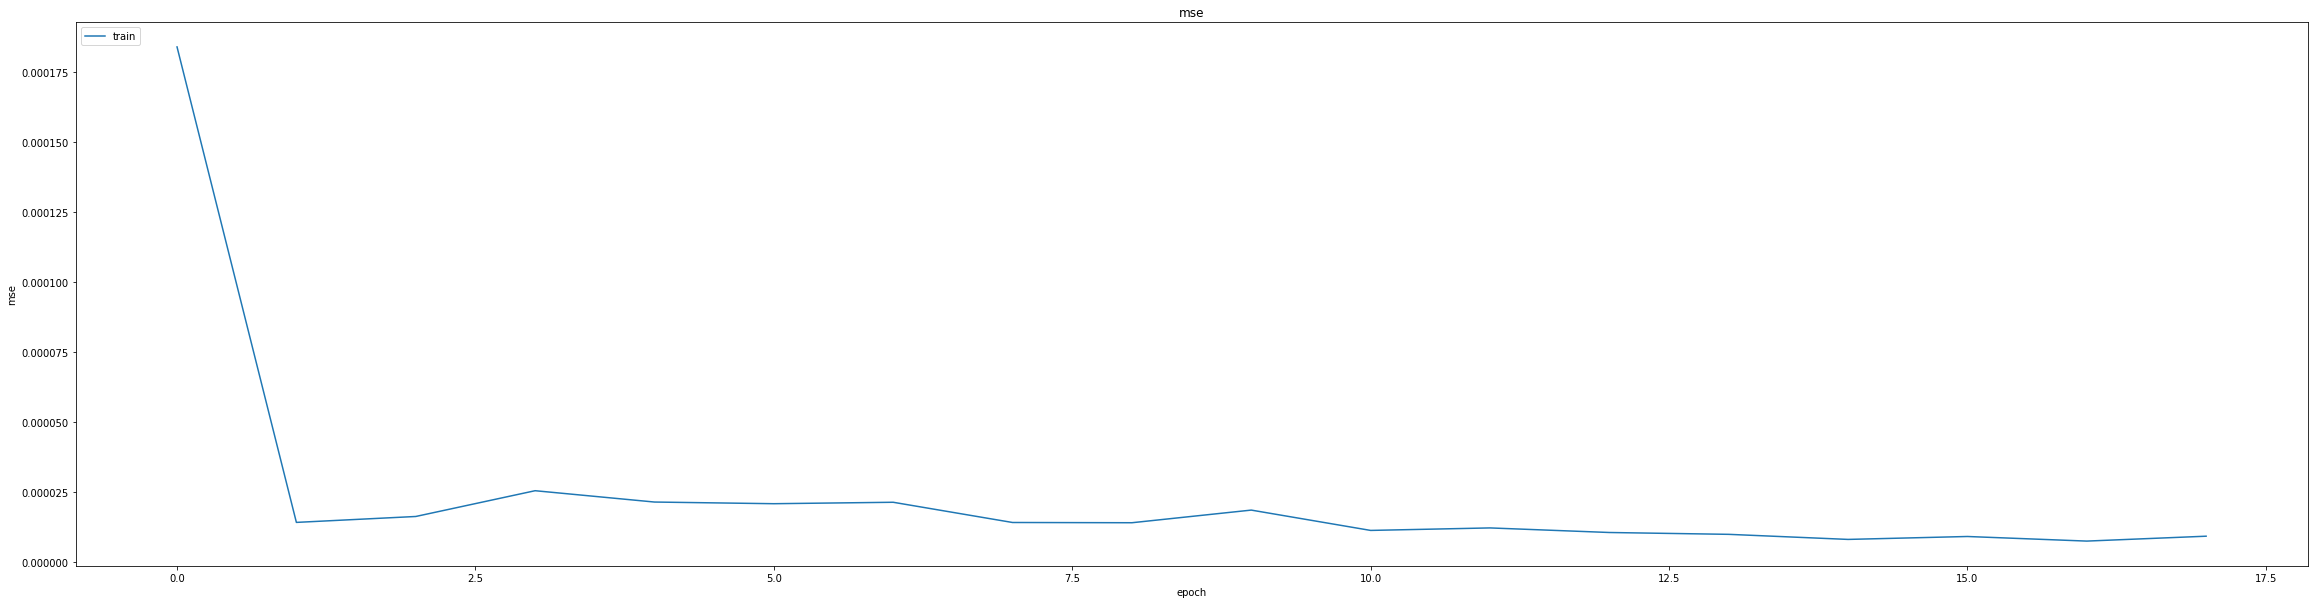

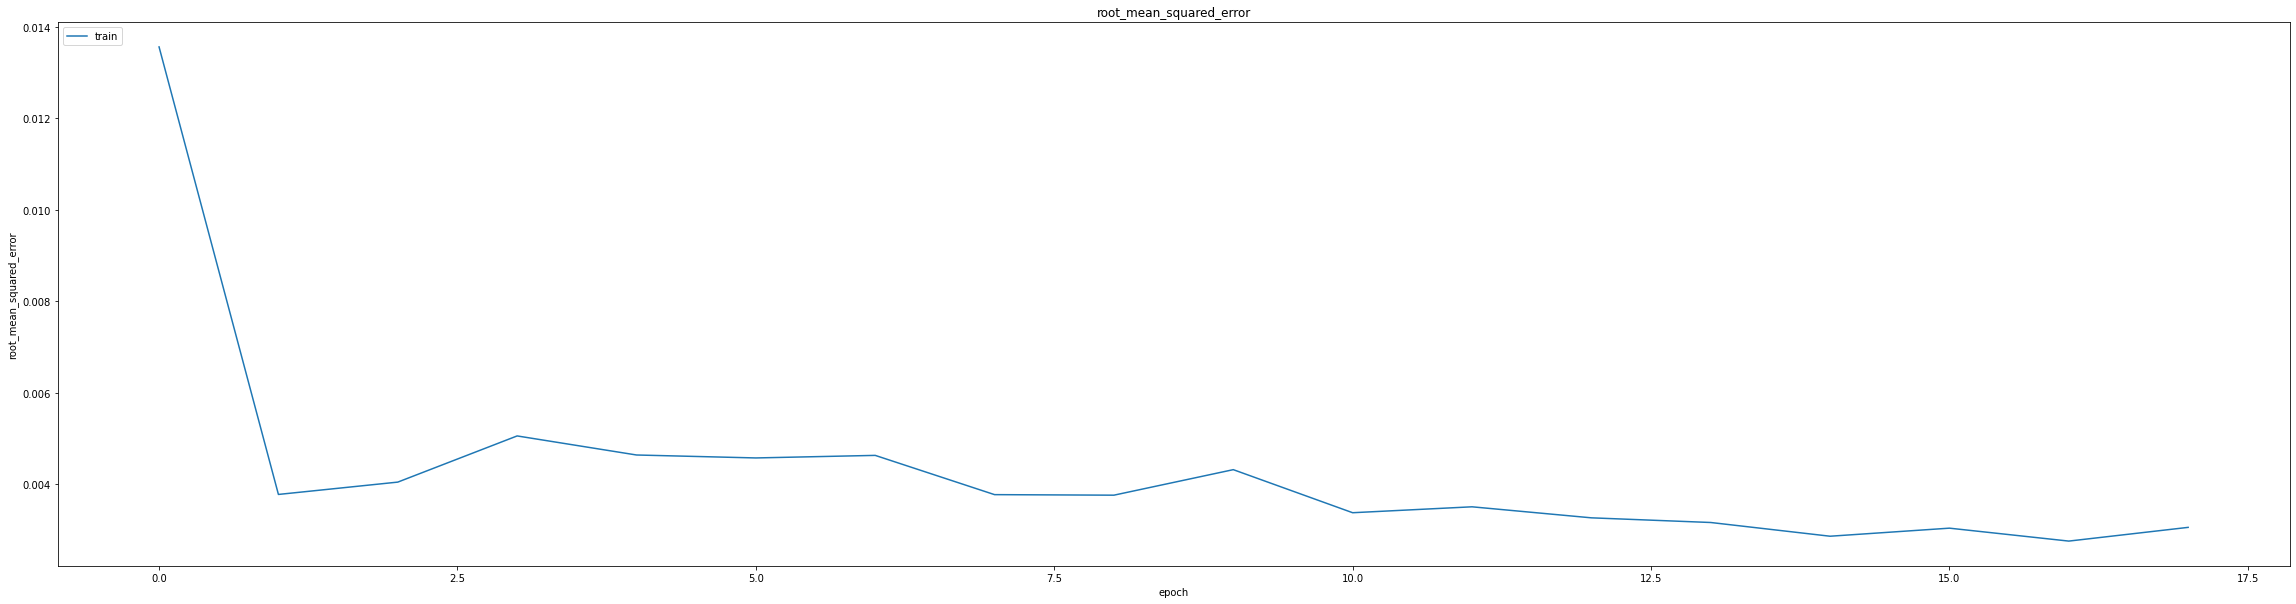

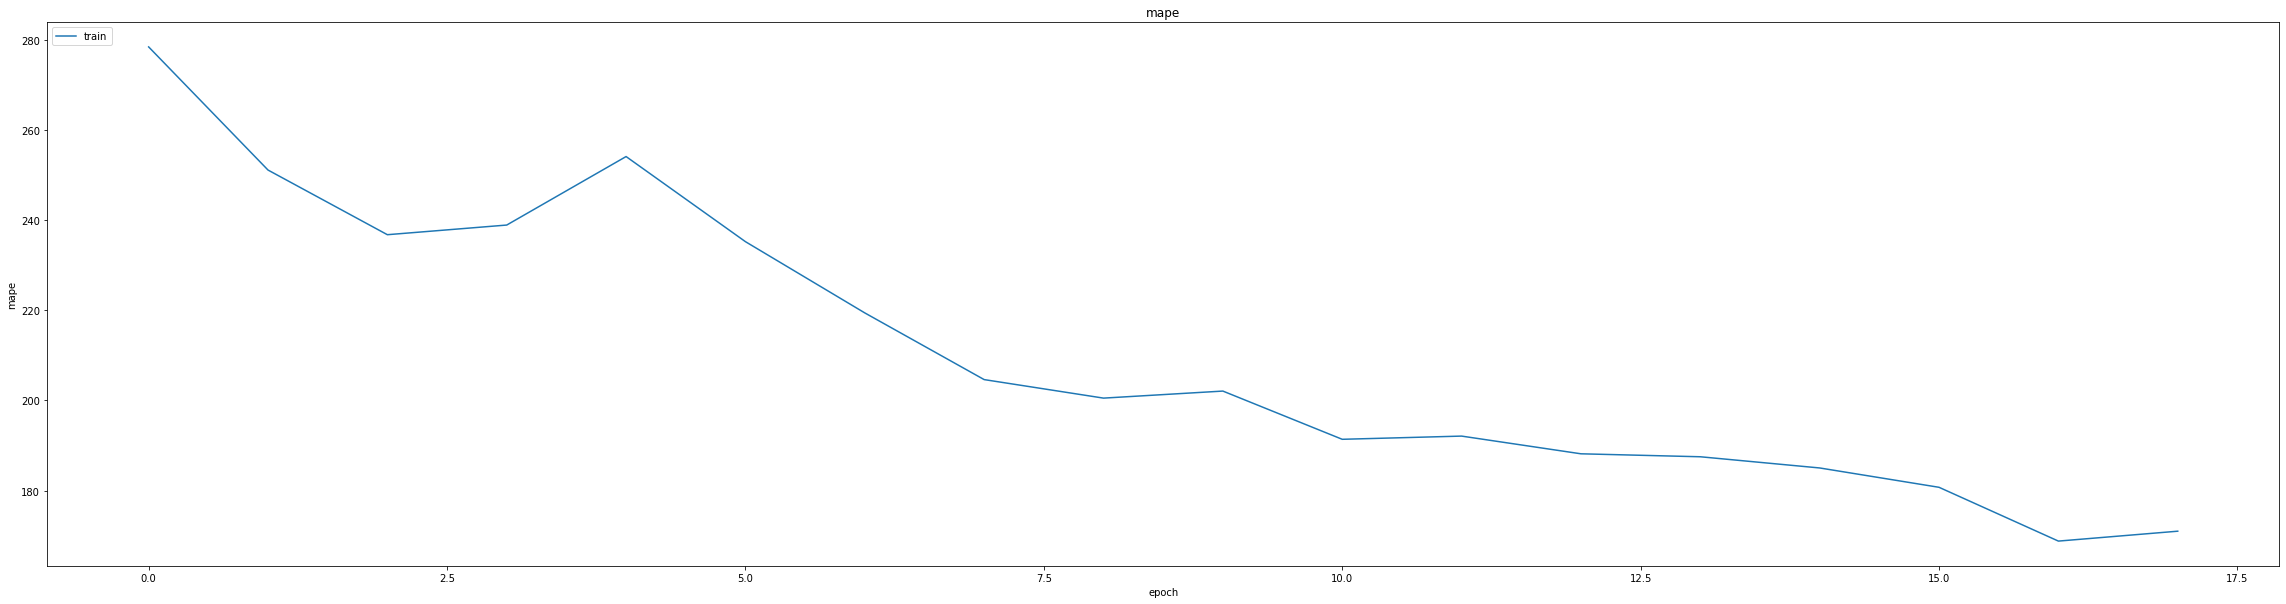

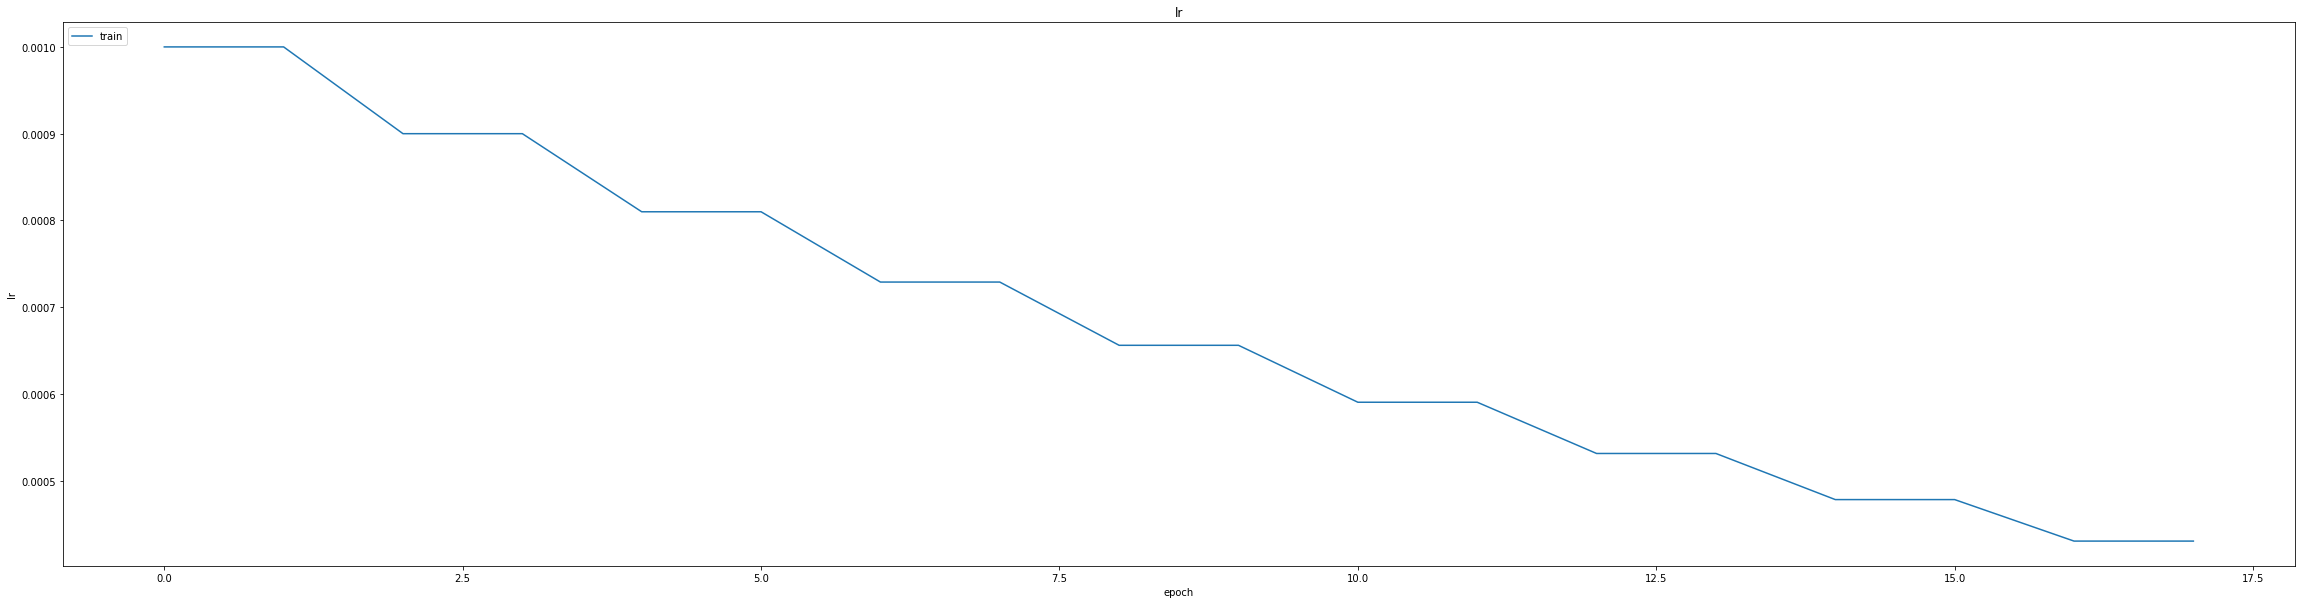

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00457417406141758
0.006442626006901264
687/687 [==============================] - 28s 38ms/step
0.9966426783664358


687/687 [==============================] - 29s 39ms/step


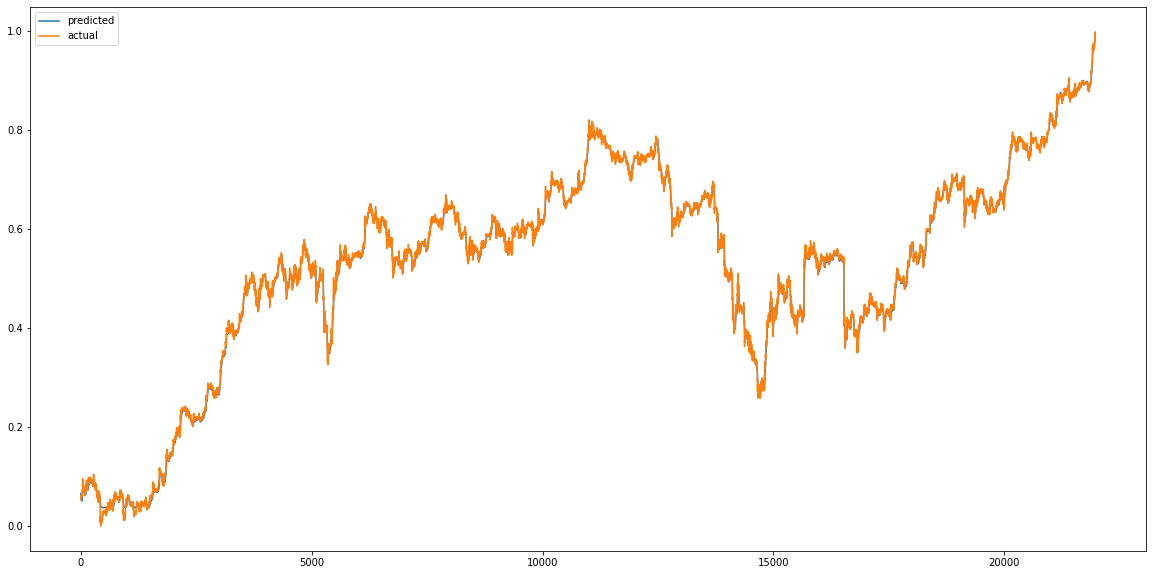

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD5_GRU_BiLSTM.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


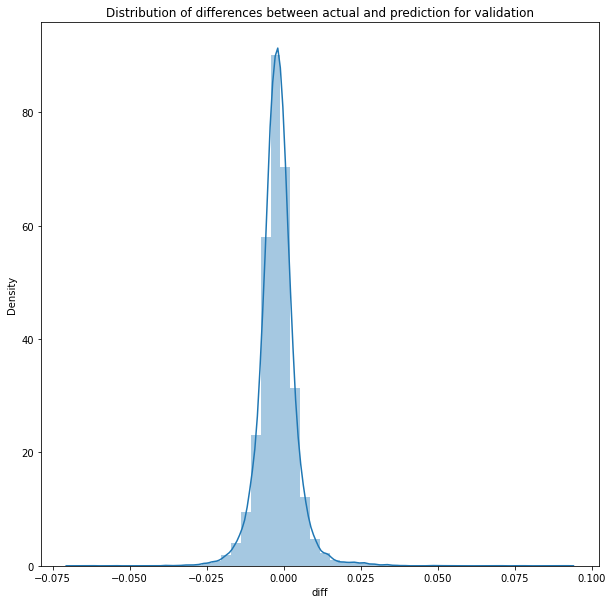

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 28s 39ms/step


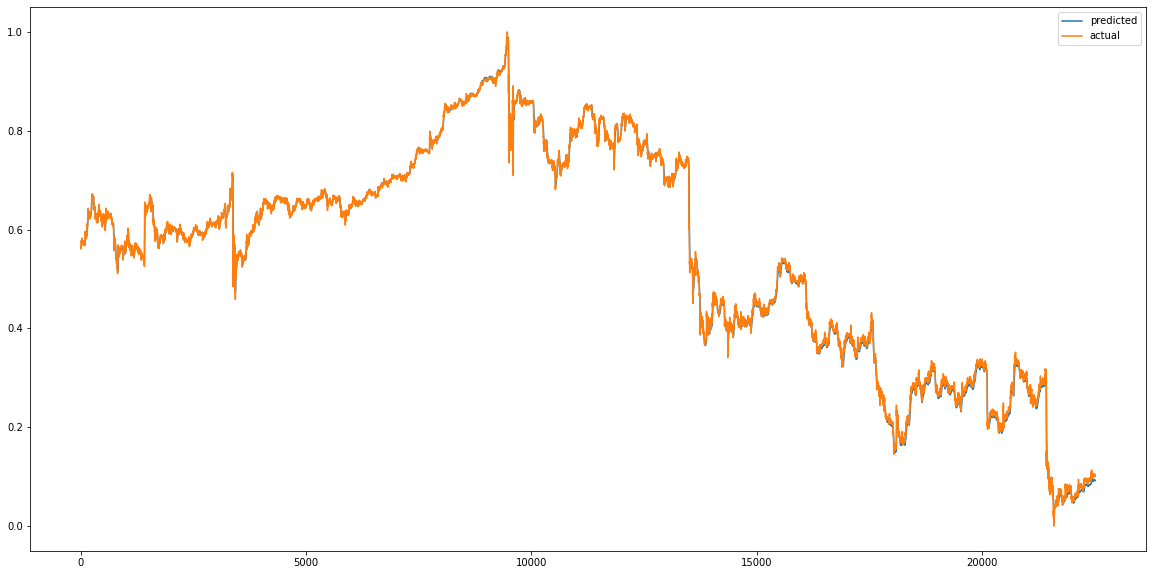

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


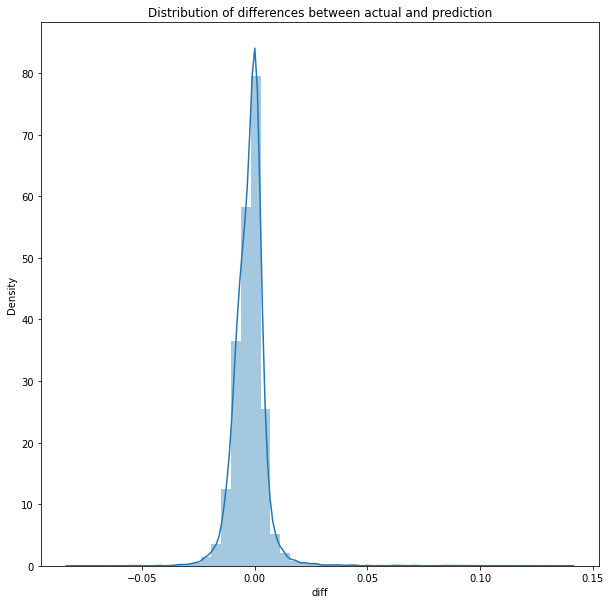

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  6.210597533707205e-05
MAE :  0.005029613389577153
RMSE  : 0.007880734441476382
704/704 [==============================] - 28s 39ms/step
R2_Score  : 0.9987470471354156


count    22523.000000
mean        -0.002238
std          0.007557
min         -0.080644
25%         -0.006007
50%         -0.001744
75%          0.001183
max          0.138385
Name: diff, dtype: float64

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           295936    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
print(x_val.shape)
print(x_train.shape)

(21975, 24, 12)
(178166, 24, 12)


In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 534.8716 - mae: 5.2156 - mse: 534.8716 - root_mean_squared_error: 23.1273 - mape: 11588.8018
Epoch 1: val_mse improved from inf to 0.08334, saving model to weights.best.hdf5
463/463 [==============================] - 197s 417ms/step - loss: 534.8716 - mae: 5.2156 - mse: 534.8716 - root_mean_squared_error: 23.1273 - mape: 11588.8018 - val_loss: 0.0833 - val_mae: 0.2221 - val_mse: 0.0833 - val_root_mean_squared_error: 0.2887 - val_mape: 33531.0508
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.1059 - mae: 0.2923 - mse: 0.1059 - root_mean_squared_error: 0.3254 - mape: 3708.8489
Epoch 2: val_mse improved from 0.08334 to 0.05372, saving model to weights.best.hdf5
463/463 [==============================] - 194s 420ms/step - loss: 0.1059 - mae: 0.2923 - mse: 0.1059 - root_mean_squared_error: 0.3254 - mape: 3708.8489 - val_loss: 0.0537 - val_mae: 0.1968 - val_mse: 0.0537 - val_root_mean_squared_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
Epochs=6
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/6
463/463 [==============================] - ETA: 0s - loss: 1.3204e-04 - mae: 0.0051 - mse: 1.3204e-04 - root_mean_squared_error: 0.0115 - mape: 269.0032
Epoch 1: val_mse did not improve from 0.00012
463/463 [==============================] - 201s 425ms/step - loss: 1.3204e-04 - mae: 0.0051 - mse: 1.3204e-04 - root_mean_squared_error: 0.0115 - mape: 269.0032 - val_loss: 2.0444e-04 - val_mae: 0.0116 - val_mse: 2.0444e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 2158.4961
Epoch 2/6
463/463 [==============================] - ETA: 0s - loss: 1.9583e-05 - mae: 0.0032 - mse: 1.9583e-05 - root_mean_squared_error: 0.0044 - mape: 220.1976
Epoch 2: val_mse improved from 0.00012 to 0.00011, saving model to weights.best.hdf5
463/463 [==============================] - 193s 417ms/step - loss: 1.9583e-05 - mae: 0.0032 - mse: 1.9583e-05 - root_mean_squared_error: 0.0044 - mape: 220.1976 - val_loss: 1.0839e-04 - val_mae: 0.0072 - val_mse: 1.0839e-04 - val_root_mean_squared_error: 0.01

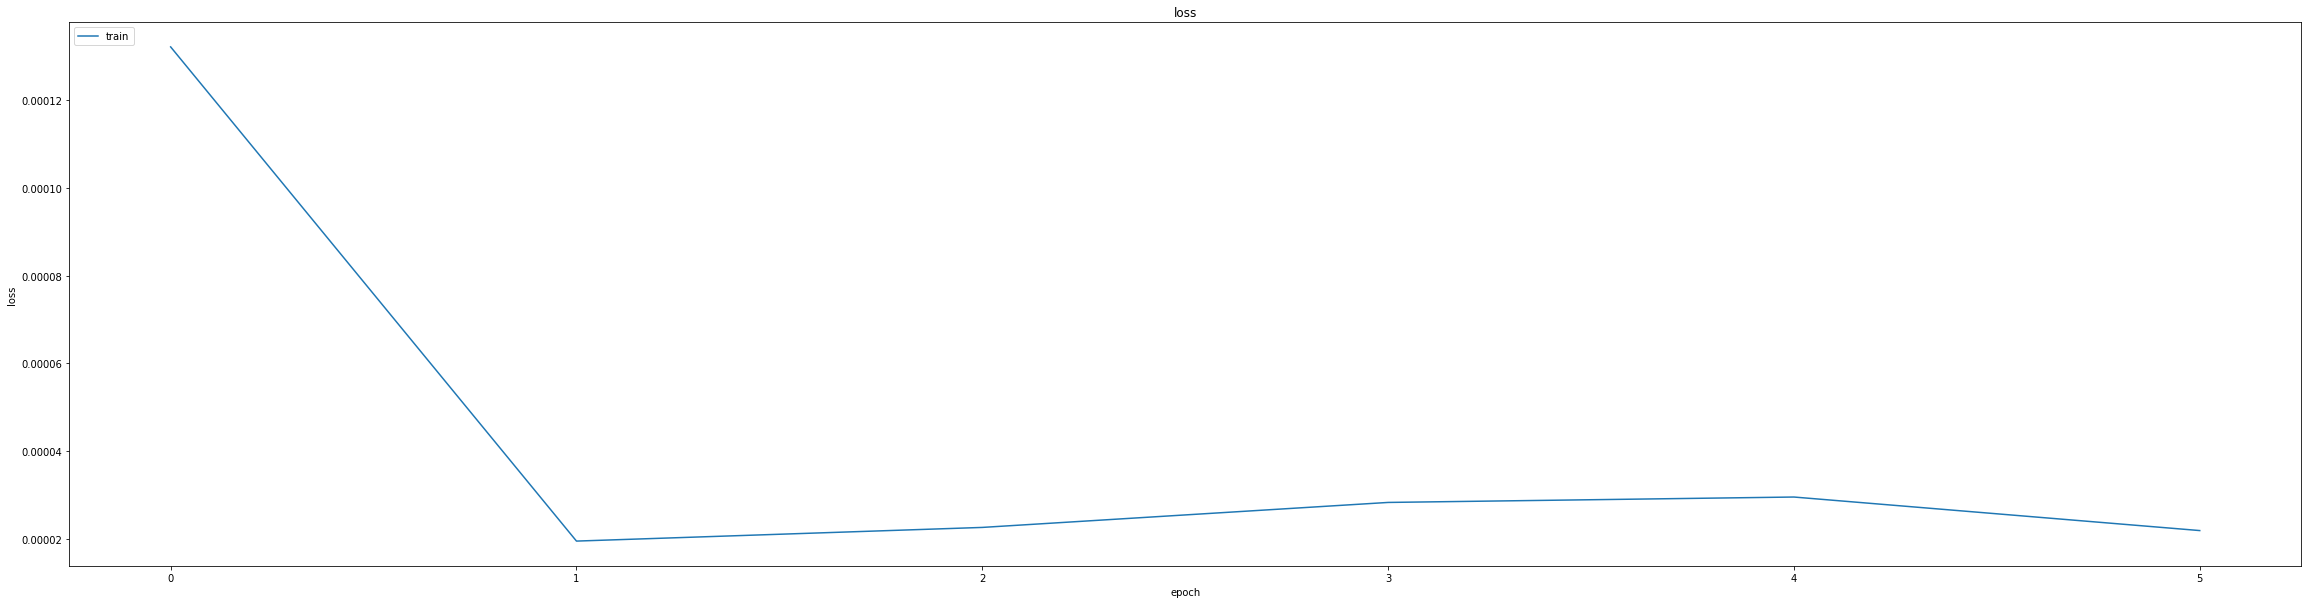

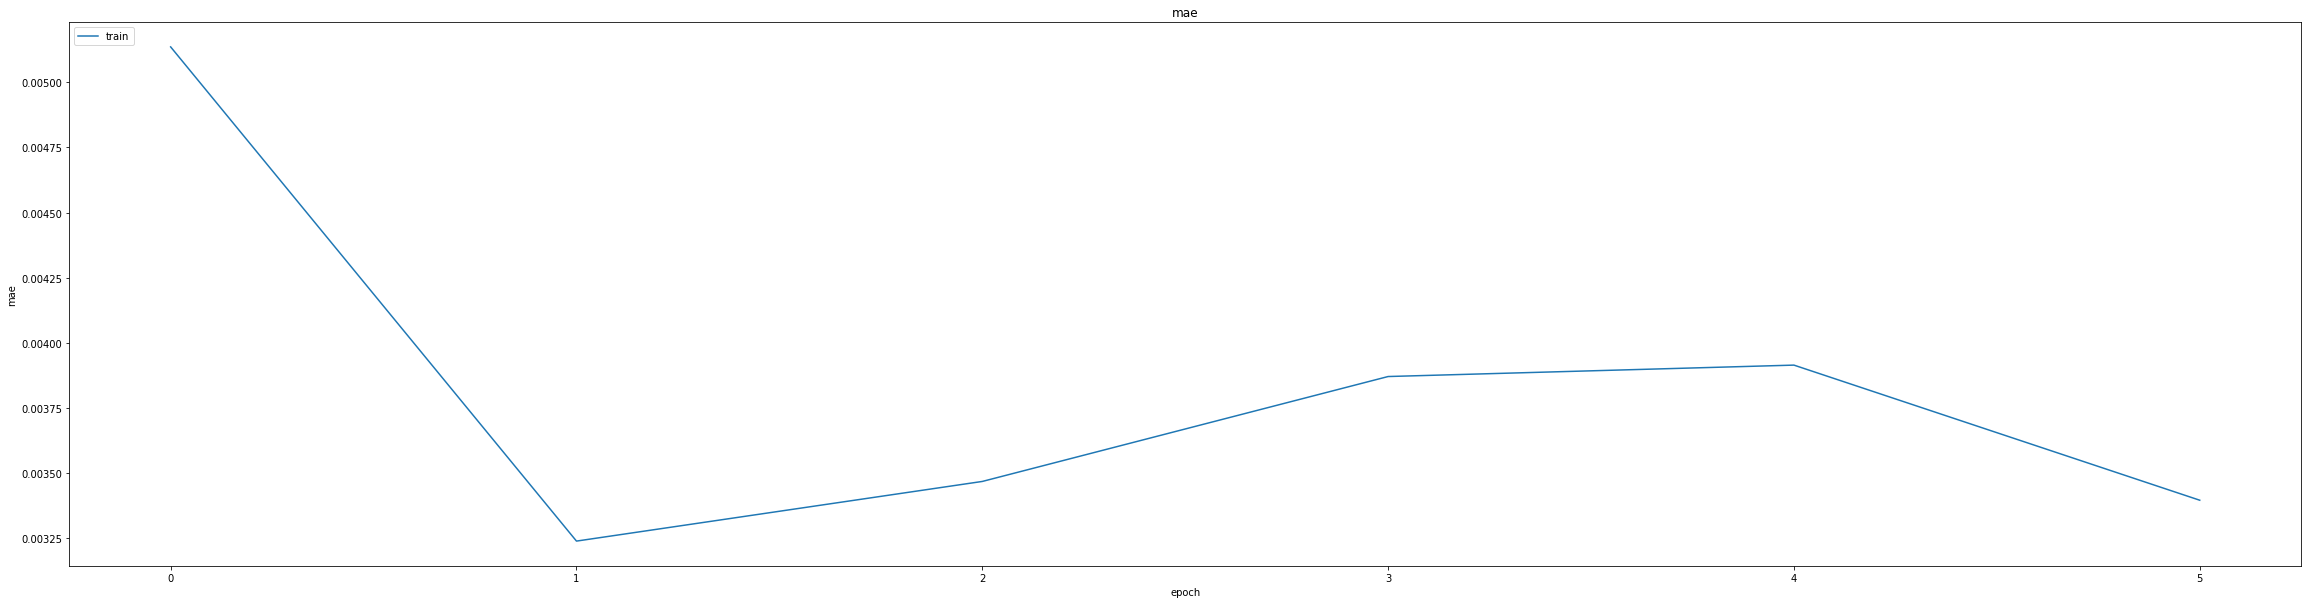

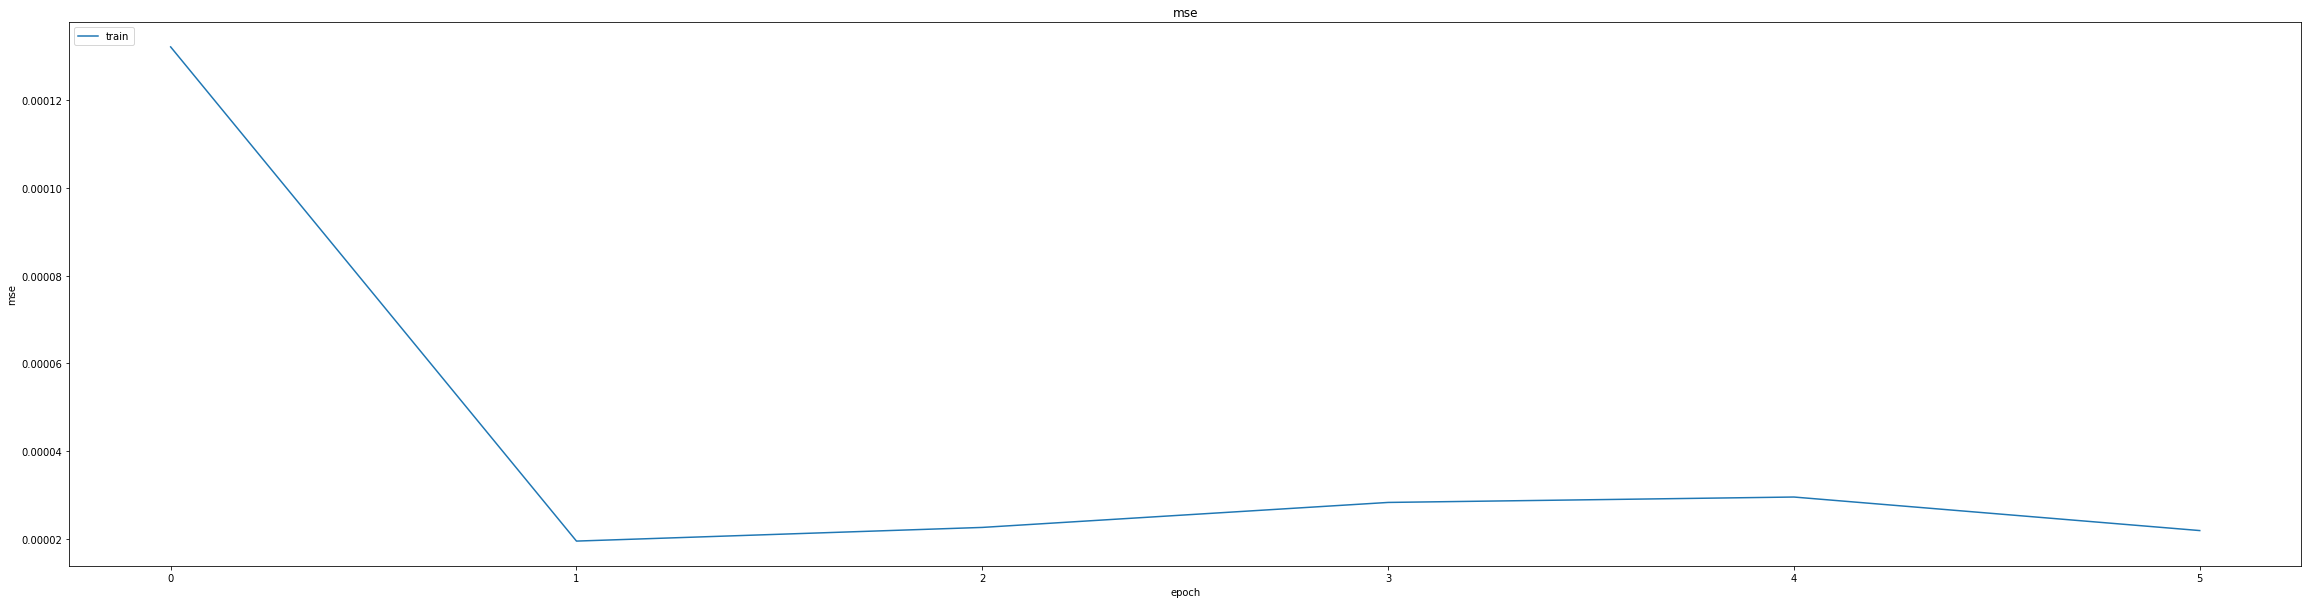

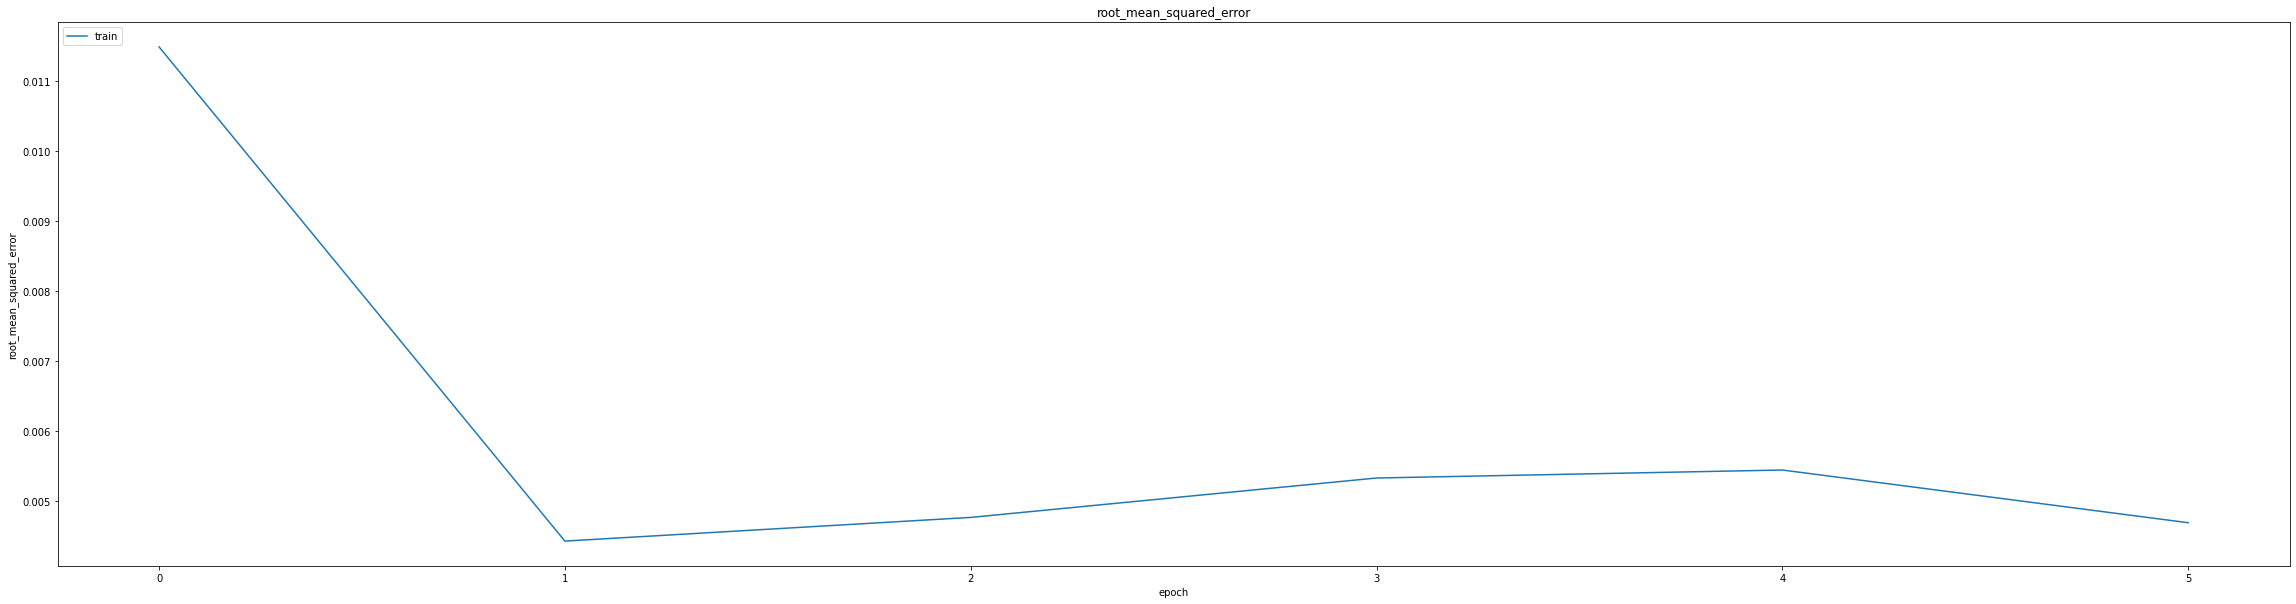

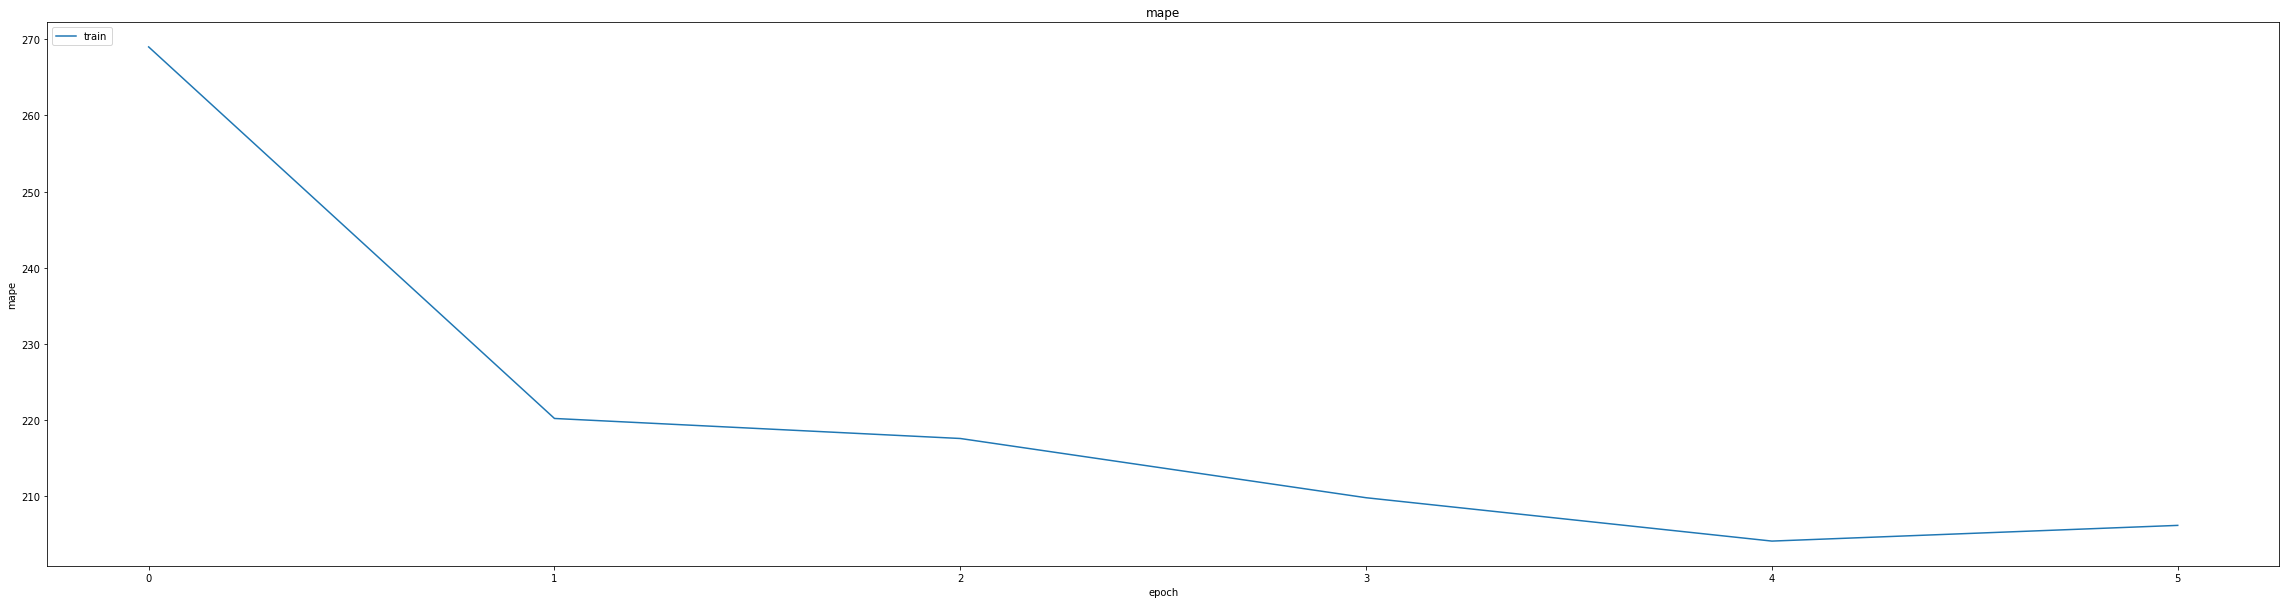

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.007201891392469406
0.010411128401756287
687/687 [==============================] - 16s 21ms/step
0.9968475812147304


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:

early_stopping = EarlyStopping(monitor='val_mse', patience=12)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(75/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
463/463 [==============================] - ETA: 0s - loss: 1.2042e-04 - mae: 0.0047 - mse: 1.2042e-04 - root_mean_squared_error: 0.0110 - mape: 248.4392
Epoch 1: val_mse did not improve from 0.00011
463/463 [==============================] - 201s 425ms/step - loss: 1.2042e-04 - mae: 0.0047 - mse: 1.2042e-04 - root_mean_squared_error: 0.0110 - mape: 248.4392 - val_loss: 1.8816e-04 - val_mae: 0.0110 - val_mse: 1.8816e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 1982.7744 - lr: 0.0010
Epoch 2/25
463/463 [==============================] - ETA: 0s - loss: 1.6051e-05 - mae: 0.0029 - mse: 1.6051e-05 - root_mean_squared_error: 0.0040 - mape: 221.7765
Epoch 2: val_mse did not improve from 0.00011
463/463 [==============================] - 196s 423ms/step - loss: 1.6051e-05 - mae: 0.0029 - mse: 1.6051e-05 - root_mean_squared_error: 0.0040 - mape: 221.7765 - val_loss: 3.9627e-04 - val_mae: 0.0176 - val_mse: 3.9627e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 1871.5055

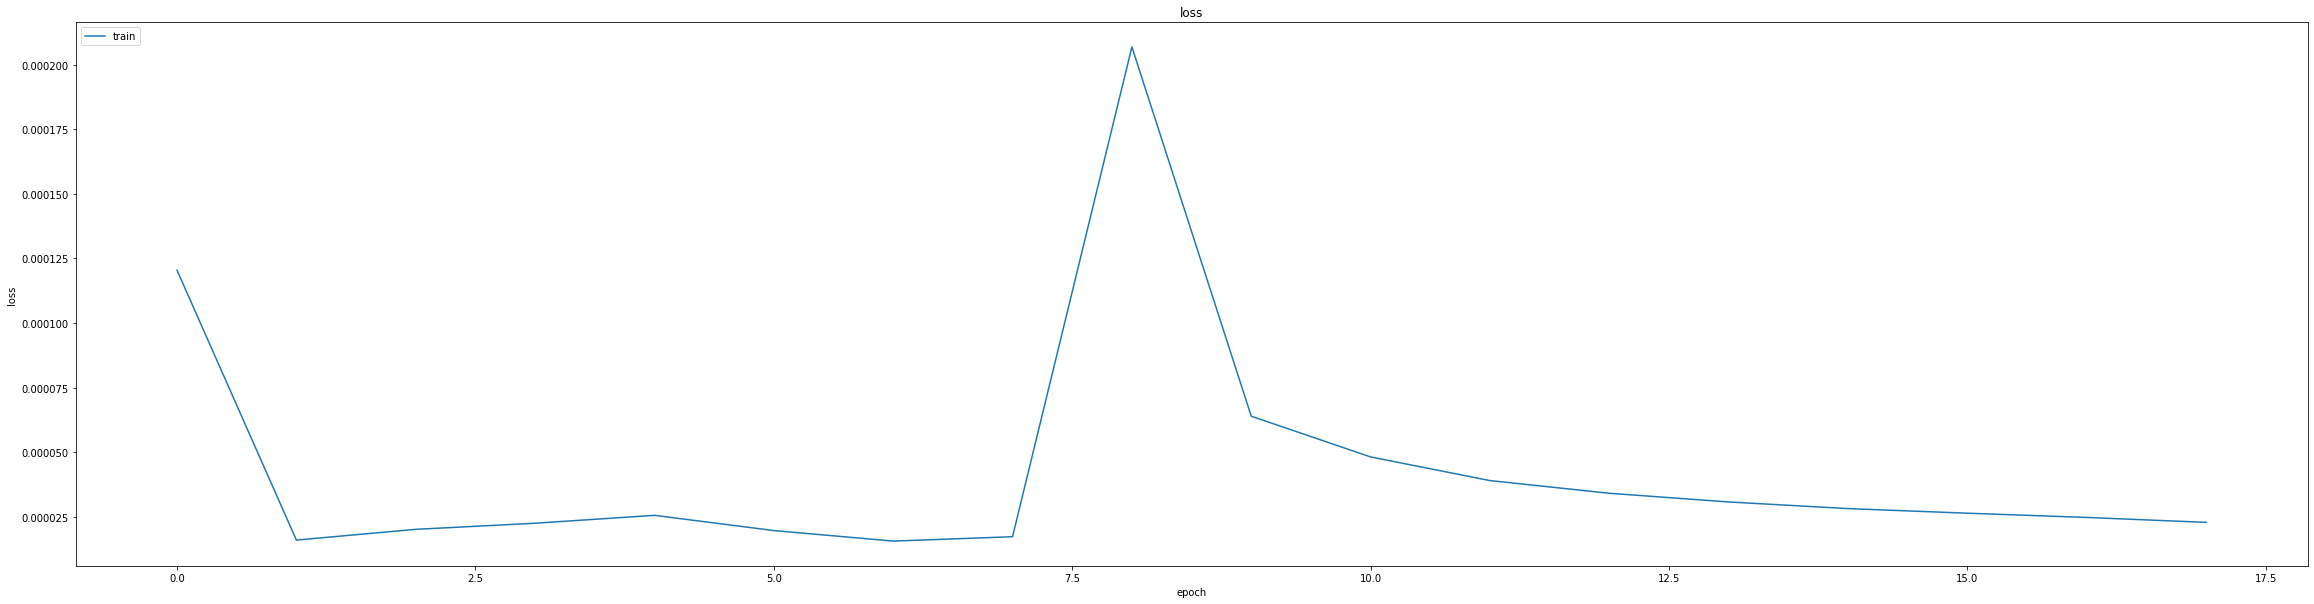

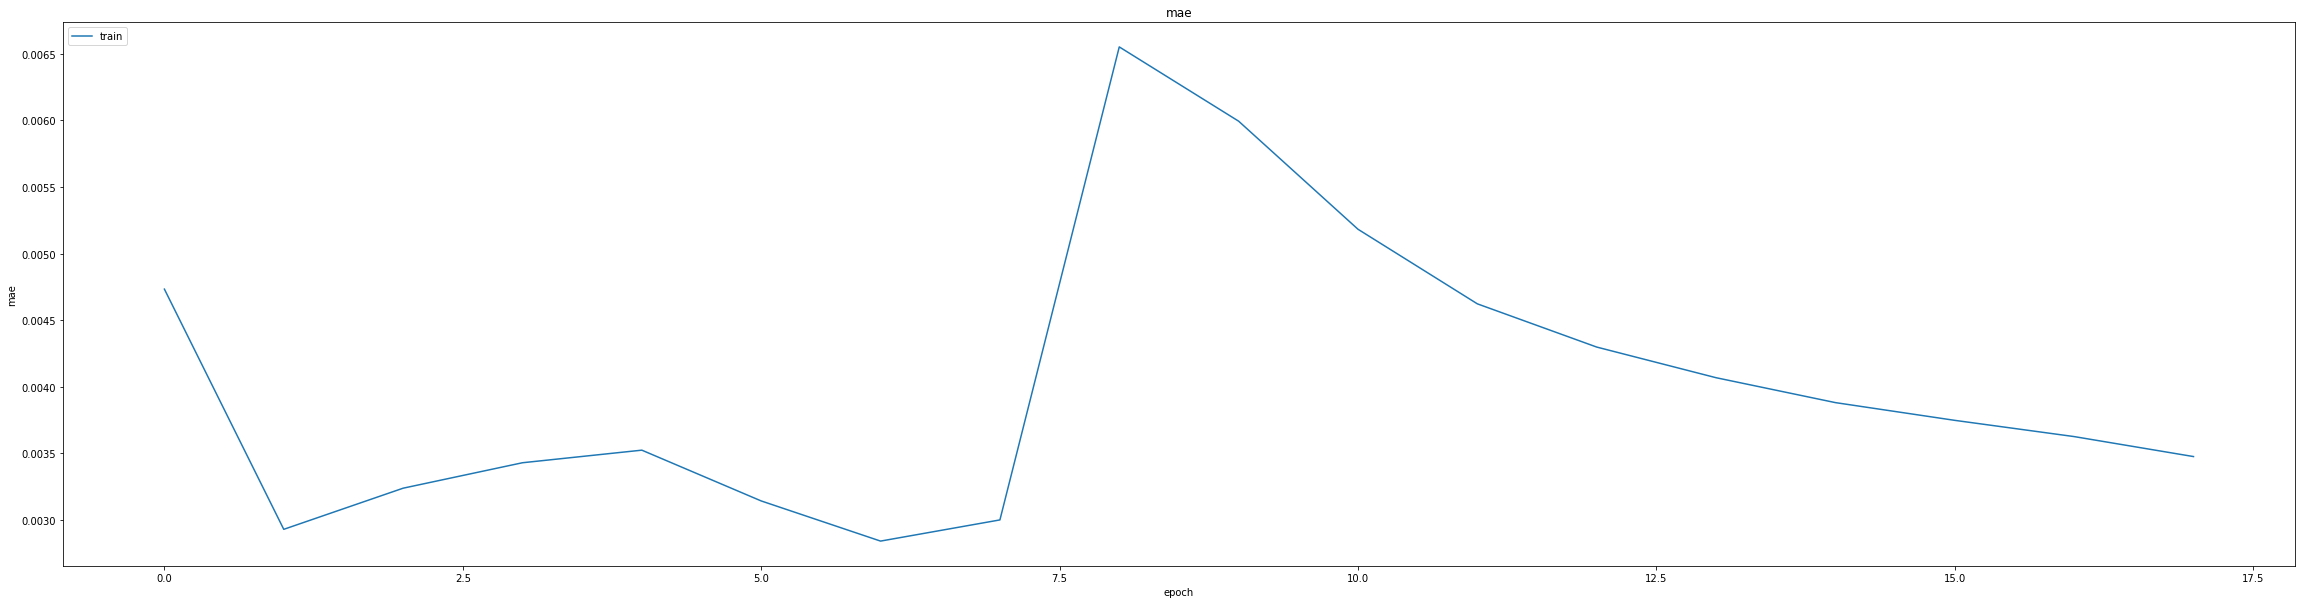

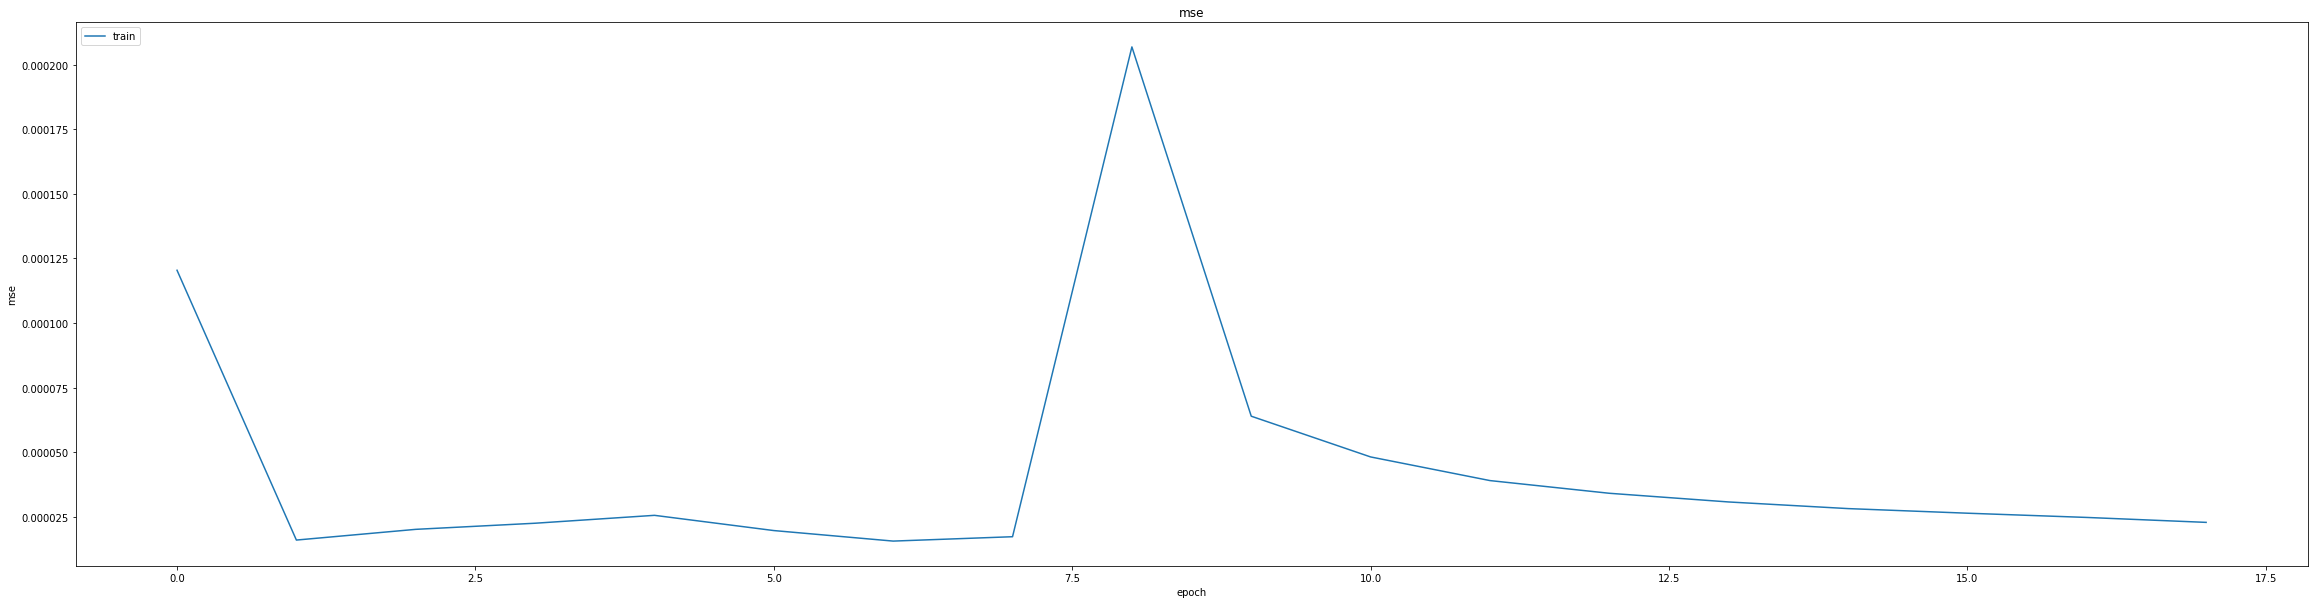

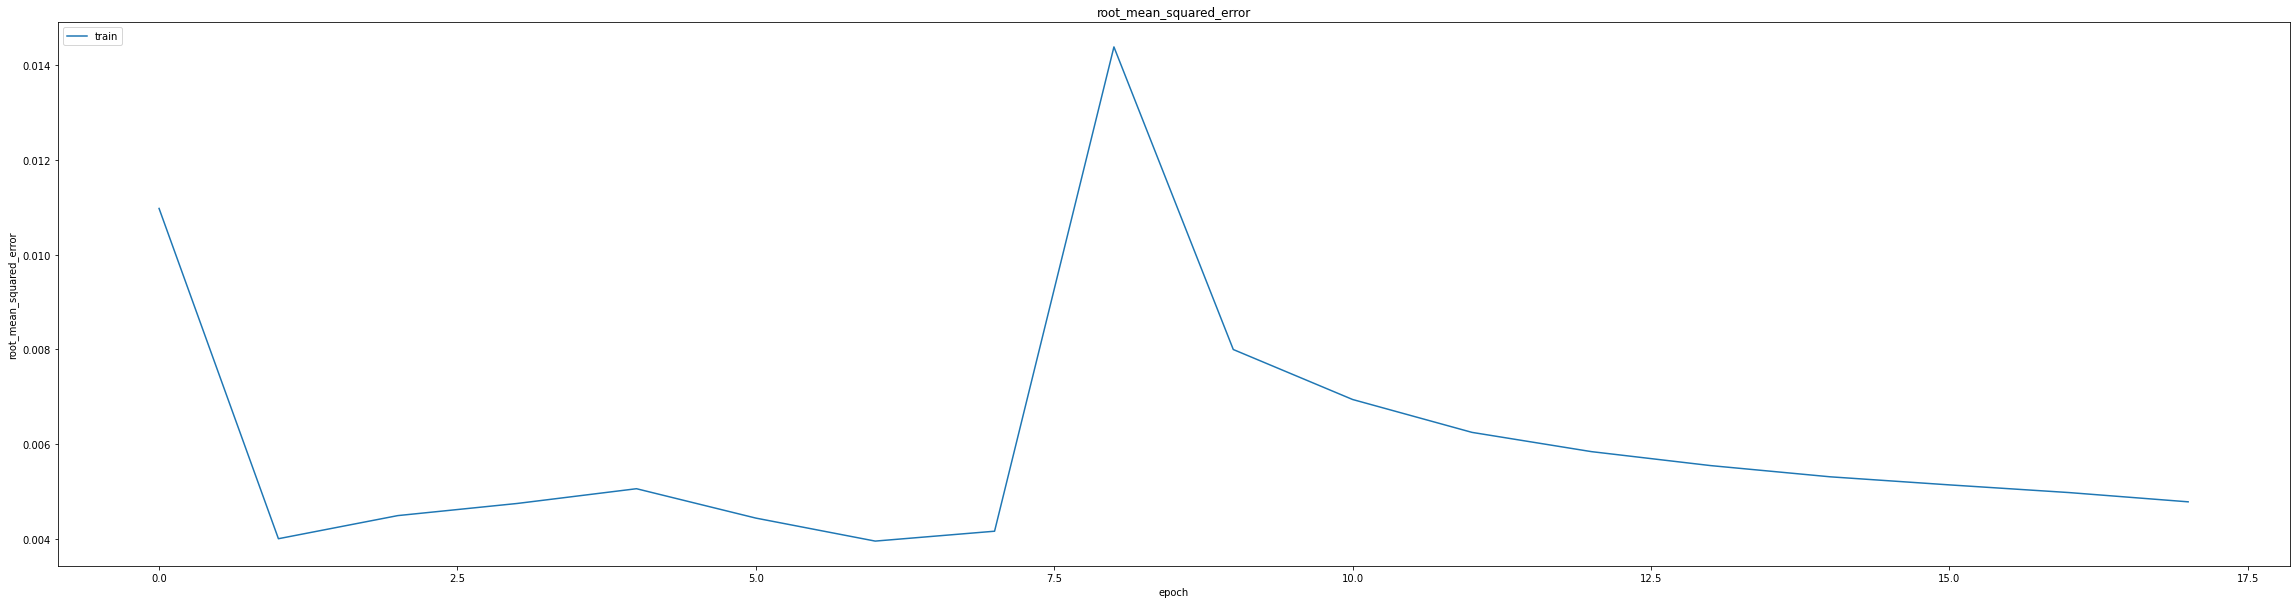

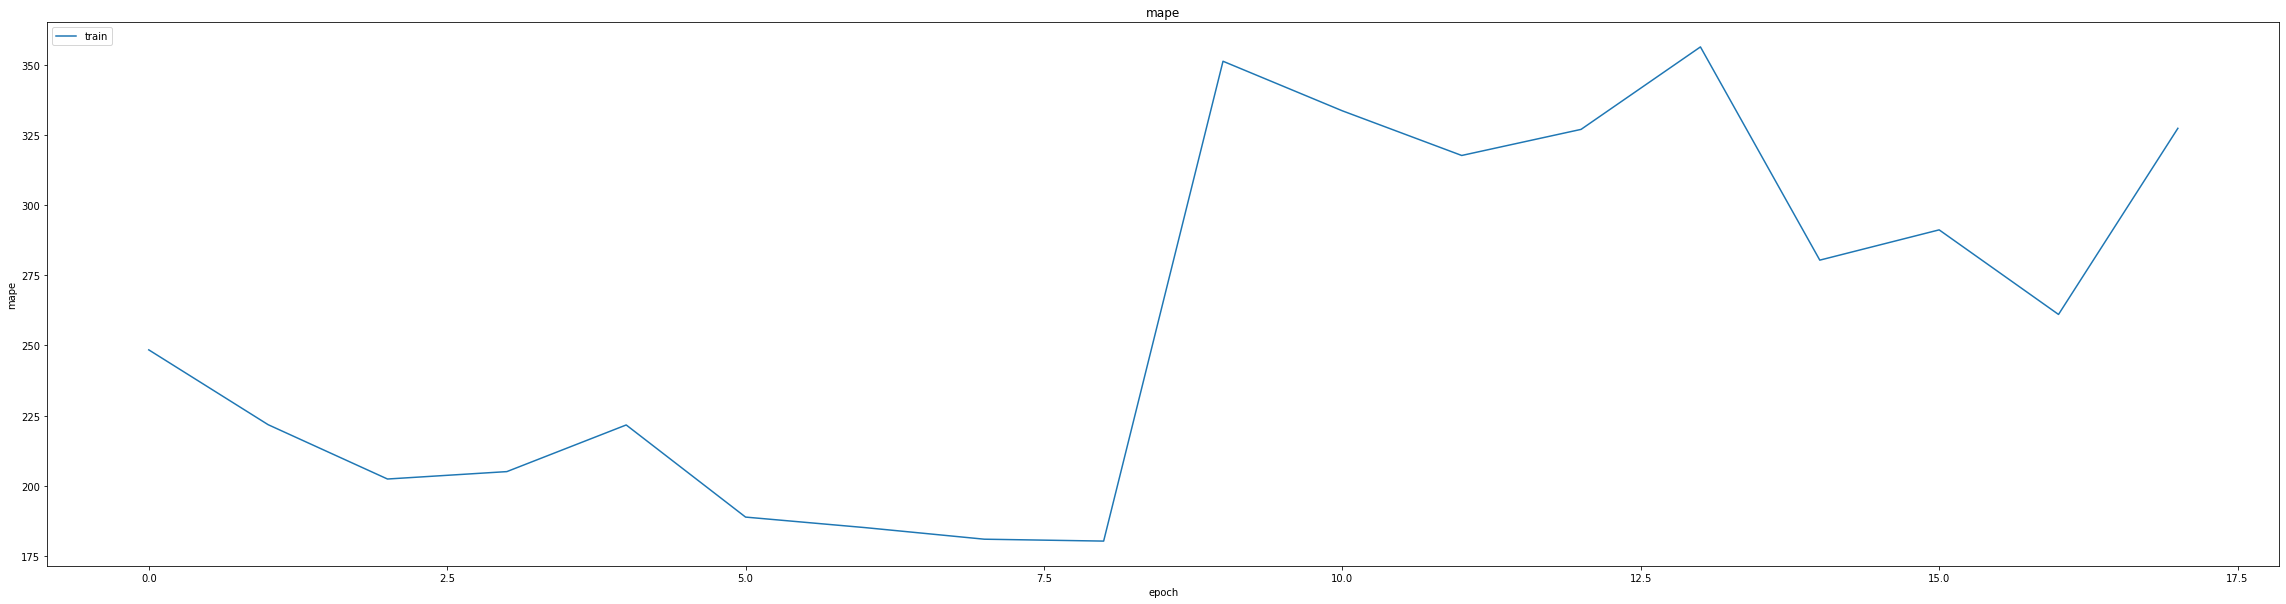

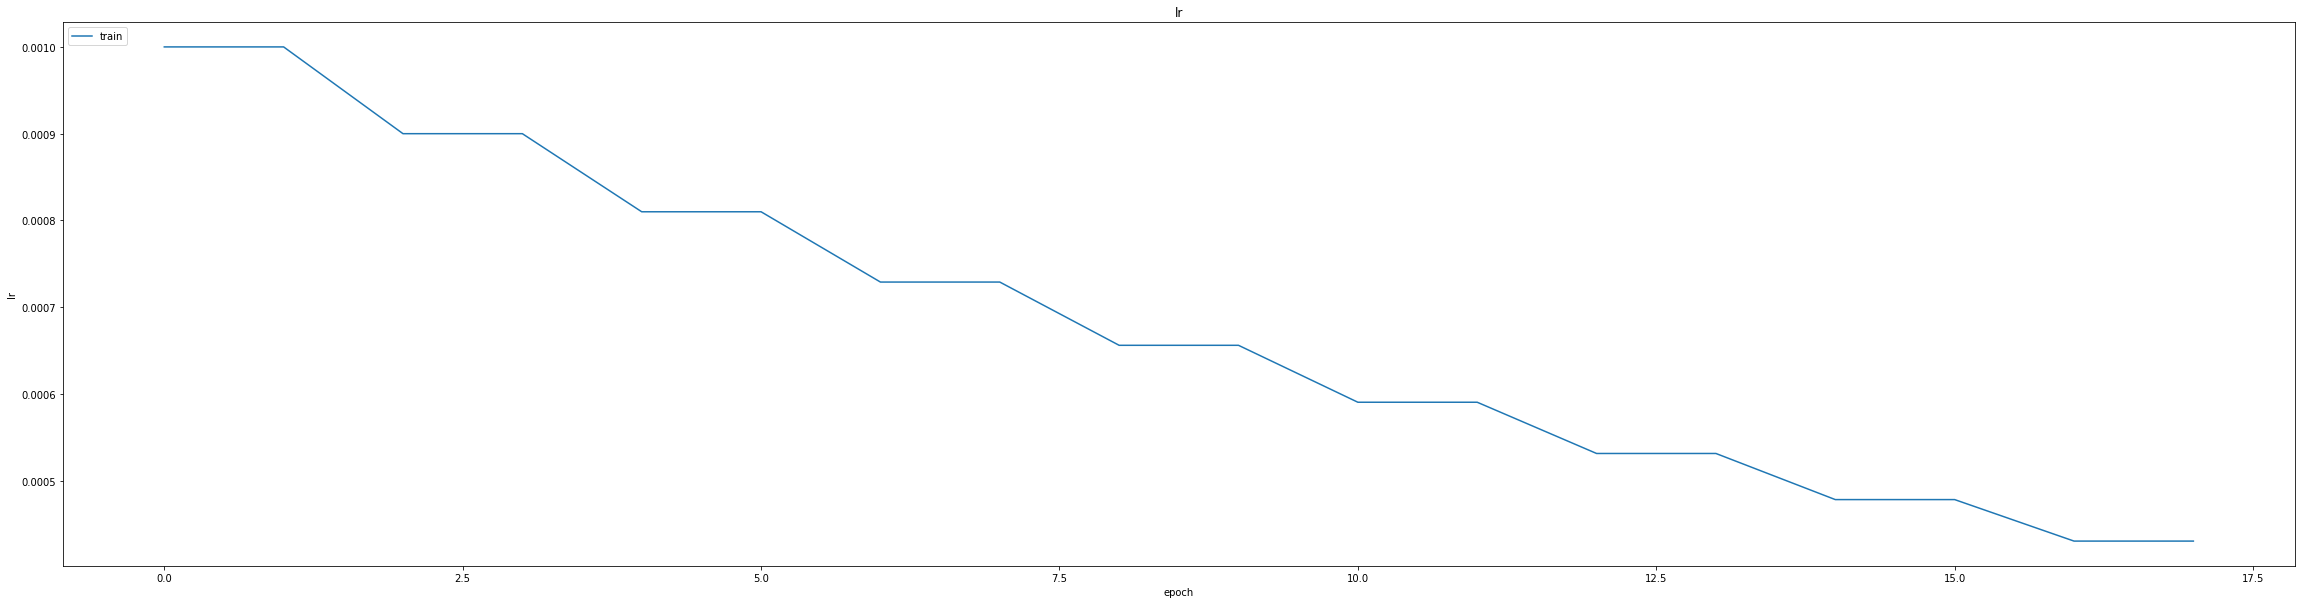

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:

print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.007677937857806683
0.010497763752937317
687/687 [==============================] - 15s 21ms/step
0.9945819264792354


In [ ]:
model.load_weights("weights.best.hdf5")

687/687 [==============================] - 16s 23ms/step


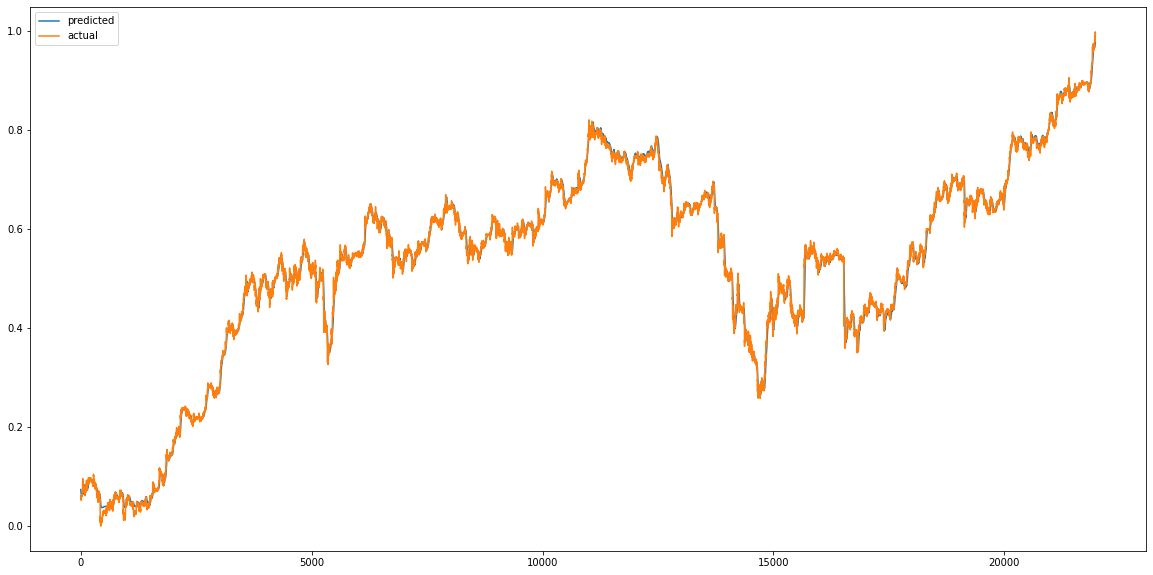

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


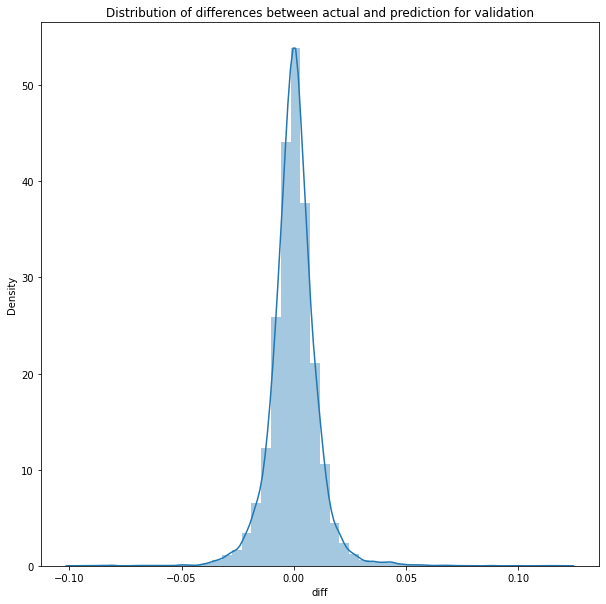

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 15s 21ms/step


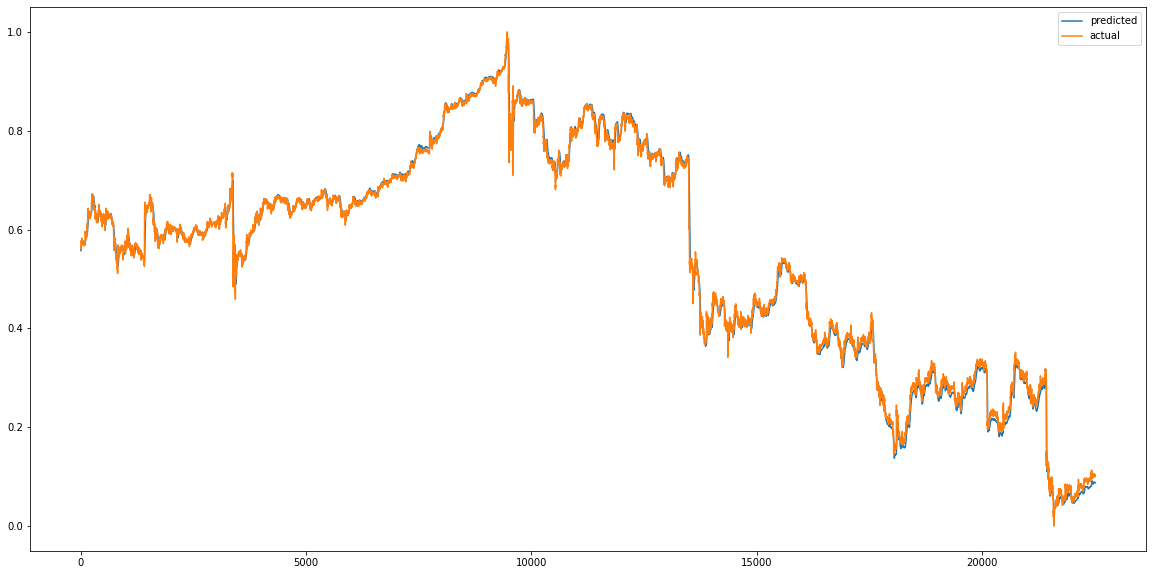

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


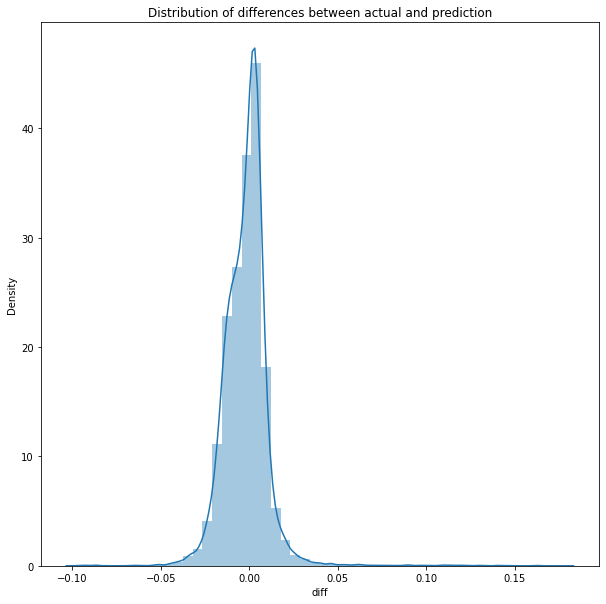

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00016374133081141002
MAE :  0.008564952597024042
RMSE :  0.012796145154358403
704/704 [==============================] - 15s 21ms/step
R2_Score  : 0.9945819264792354


count    22523.000000
mean        -0.001839
std          0.012664
min         -0.098200
25%         -0.009007
50%         -0.000775
75%          0.004467
max          0.177909
Name: diff, dtype: float64